Theo Tổ chức Y tế Thế giới (WHO), đột quỵ là nguyên nhân gây tử vong hàng đầu thứ hai trên toàn cầu, chiếm khoảng 11% tổng số ca tử vong. Bộ dữ liệu này được sử dụng để dự đoán xem một bệnh nhân có khả năng bị đột quỵ dựa trên các thông số đầu vào như giới tính, tuổi, các bệnh lý khác nhau và tình trạng hút thuốc. Mỗi hàng trong dữ liệu cung cấp thông tin liên quan về bệnh nhân.

Chú thích các thông số:
1. id: định danh cá nhân
2. gender:
*   Male : Nam
*   Female : Nữ
*   Other : Khác
3. age: tuổi của bệnh nhân
4. hypertension:  
*   0 : bệnh nhân không mắc bệnh tăng huyết áp
*   1 : bệnh nhân mắc bệnh tăng huyết áp
5. heart_disease:
*   0 : bệnh nhân không mắc bệnh tim
*   1 : bệnh nhân mắc bệnh tim
6. ever_married:
*   No : Không kết hôn
*   Yes : Kết hôn
7. work_type:
*   children : Trẻ em
*   Govt_job : Công chức
*   Never_worked : Chưa từng làm việc
*   Private : Tư nhân
*   Self-employed : Tự doanh
8. Residence_type:
*   Rural : Nông thôn
*   Urban : Thành thị
9. avg_glucose_level: mức độ glucose trung bình trong máu
10. bmi: chỉ số khối cơ thể (Body Mass Index)
11. smoking_status:
*   formerly smoked : Từng hút thuốc
*   never smoked : Không hút thuốc
*   smoked : Hút thuốc
*   Unknown : Không rõ
12. stroke:
*   1 : bệnh nhân đã bị đột quỵ
*   0 : bệnh nhân không bị đột quỵ



In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas
plt.rcParams.update({'figure.figsize':(16,4), 'figure.dpi':120})

In [ ]:
link = 'https://drive.google.com/file/d/1RVRrV_EpiDSPO_yYEATa6GLWx5uLn6d9/view?usp=sharing'
path =  'https://drive.google.com/uc?export=download&id='+link.split('/')[-2]
df = pd.read_csv(path)

In [ ]:
df.head(5)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [ ]:
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

Cột bmi có 201 giá trị NULL cần xử lý

In [ ]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


1.   Cột age có min = 0.08 cần kiểm tra outlier


> Tạo thêm cột age_group bao gồm child(0-16), young adult(17-30), middle-aged adult(31-45), old-aged adult (>45)


2.   BMI:
*   Dưới 18,5 :  nhẹ cân
*   18,5-24,9 : bình thường
*   25-29,9 : thừa cân
*   30 trở lên : béo phì
> Tạo thêm cột weight bao gồm các thông số: underweight(nhẹ cân), healthy(bình thường), overweight(thừa cân), obesity(béo phì) để xác định mức độ ảnh hưởng của cân nặng tới đột quỵ

3. avg_glucose_level: chỉ số đường huyết được xét theo lúc đói, sau ăn, trước khi đi ngủ và bất kỳ trong trường hợp bộ data không đề cập tới thì chúng ta coi thông số đường huyết được đo bất kỳ
*   Dưới 70: hạ đường huyết
*   70-140: bình thường
*   140-200: tiền tiểu đường
*   200 trở lên: Tiểu đường
> Tạo thêm cột diabete bao gồm các thông số: hypoglycemia(hạ đường huyết), healthy(bình thường), prediabete(tiền tiểu đường), diabete(Tiểu đường) để xác định mức độ ảnh hưởng của bệnh tiểu đường tới đột quỵ






In [ ]:
df.describe(include=object)

,gender,ever_married,work_type,Residence_type,smoking_status
count,5110,5110,5110,5110,5110
unique,3,2,5,2,4
top,Female,Yes,Private,Urban,never smoked
freq,2994,3353,2925,2596,1892


##Data cleaning

In [ ]:
# Xóa cột id:
df = df.drop('id', axis=1)

In [ ]:
# Tạo thêm cột age_group
df.insert(2, 'age_group', np.where(df['age'] < 16, 'child',
                                np.where(df['age'] <= 30, 'young adult',
                                         np.where(df['age'] <= 45, 'middle-aged adult', 'old-aged adult'))))

In [ ]:
df['age_group'].value_counts()

old-aged adult       2492
middle-aged adult    1048
young adult           826
child                 744
Name: age_group, dtype: int64

In [ ]:
mean_old = df[df['age_group']=='old-aged adult']['bmi'].mean()
mean_middle = df[df['age_group']=='middle-aged adult']['bmi'].mean()
mean_young = df[df['age_group']=='young adult']['bmi'].mean()
mean_child = df[df['age_group']=='child']['bmi'].mean()

In [ ]:
def filling_bmi(age_group_bmi):
    age_group = age_group_bmi[0]
    bmi = age_group_bmi[1]
    if pd.isnull(bmi):
        if 'old-aged adult' in age_group:
            return mean_old
        if 'middle-aged adult' in age_group:
            return mean_middle
        if 'young adult' in age_group:
            return mean_young
        if 'child' in age_group:
            return mean_child
    else:
        return bmi

In [ ]:
df[['age_group','bmi']]

,age_group,bmi
0,old-aged adult,36.6
1,old-aged adult,NaN
2,old-aged adult,32.5
3,old-aged adult,34.4
4,old-aged adult,24.0
...,...,...
5105,old-aged adult,NaN
5106,old-aged adult,40.0
5107,middle-aged adult,30.6
5108,old-aged adult,25.6


In [ ]:
df['bmi']=df[['age_group','bmi']].apply(filling_bmi,axis = 1)

In [ ]:
# Tạo thêm cột weight
df.insert(10, 'weight', np.where(df['bmi'] < 18.5, 'underweight',
                                np.where(df['bmi'] <= 24.9, 'healthy',
                                         np.where(df['bmi'] <= 29.9, 'overweight', 'obesity'))))

In [ ]:
# Tạo thêm cột diabete
df.insert(9, 'diabete', np.where(df['avg_glucose_level'] < 70, 'hypoglycemia',
                                np.where(df['avg_glucose_level'] <= 140, 'healthy',
                                         np.where(df['avg_glucose_level'] <= 200, 'prediabete', 'diabete'))))

In [ ]:
df.isnull().sum()

gender               0
age                  0
age_group            0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
diabete              0
bmi                  0
weight               0
smoking_status       0
stroke               0
dtype: int64

In [ ]:
df.tail(5)

,gender,age,age_group,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,diabete,bmi,weight,smoking_status,stroke
5105,Female,80.0,old-aged adult,1,0,Yes,Private,Urban,83.75,healthy,30.745428,obesity,never smoked,0
5106,Female,81.0,old-aged adult,0,0,Yes,Self-employed,Urban,125.20,healthy,40.000000,obesity,never smoked,0
5107,Female,35.0,middle-aged adult,0,0,Yes,Self-employed,Rural,82.99,healthy,30.600000,obesity,never smoked,0
5108,Male,51.0,old-aged adult,0,0,Yes,Private,Rural,166.29,prediabete,25.600000,overweight,formerly smoked,0
5109,Female,44.0,middle-aged adult,0,0,Yes,Govt_job,Urban,85.28,healthy,26.200000,overweight,Unknown,0


In [ ]:
file = df.to_csv("file_cleaned_final_project_DA39.csv")

##EDA

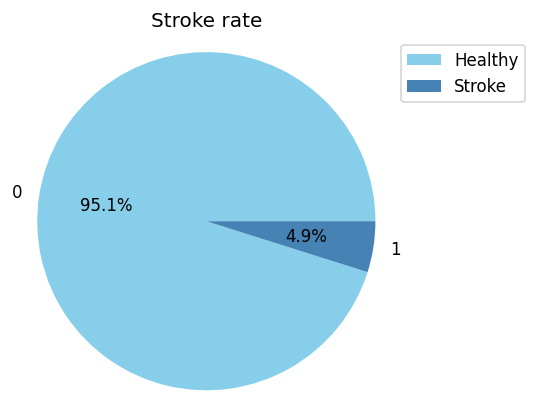

In [ ]:
plt.figure(figsize=(4,4))
colors=['skyblue','steelblue']
plt.pie(df['stroke'].value_counts(), labels=df['stroke'].value_counts().index, autopct='%1.1f%%', colors=colors)
plt.title('Stroke rate')
plt.legend(['Healthy','Stroke'], bbox_to_anchor=(1, 1))
plt.axis('equal')
plt.show()

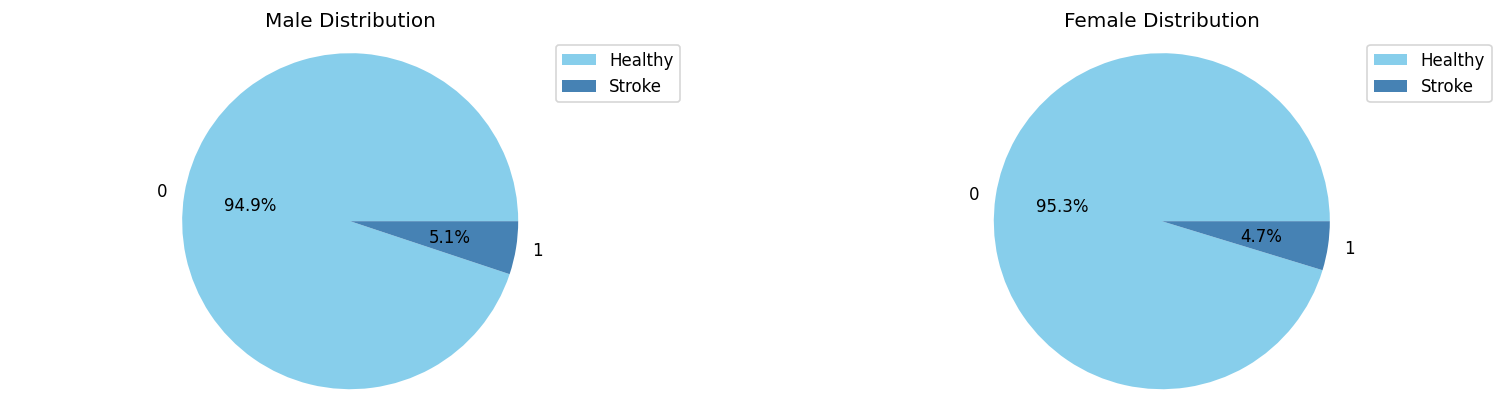

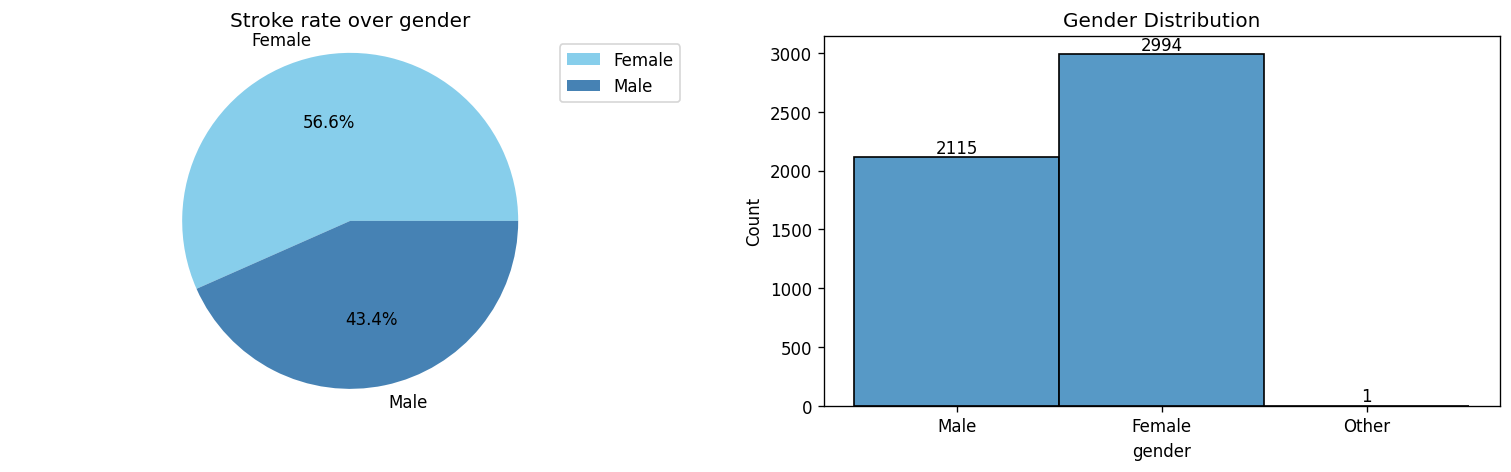

In [ ]:
colors=['skyblue','steelblue']
plt.subplot(1,2,1)
male_counts = df[df['gender'] == 'Male']['stroke'].value_counts()
plt.pie(male_counts, labels=male_counts.index, autopct='%1.1f%%', colors=colors)
plt.title('Male Distribution')
plt.legend(["Healthy", "Stroke"])
plt.axis('equal')

plt.subplot(1,2,2)
male_counts = df[df['gender'] == 'Female']['stroke'].value_counts()
plt.pie(male_counts, labels=male_counts.index, autopct='%1.1f%%', colors=colors)
plt.title('Female Distribution')
plt.legend(["Healthy", "Stroke"])
plt.axis('equal')
plt.show()

plt.subplot(1,2,1)
gender_counts = df[df['stroke'] == 1]['gender'].value_counts()
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', colors=colors)
plt.title('Stroke rate over gender')
plt.legend(['Female','Male'], bbox_to_anchor=(1, 1))
plt.axis('equal')

plt.subplot(1,2,2)
plt.title('Gender Distribution')
sns.histplot(df.gender, discrete=True)
for p in plt.gca().patches:
    height = p.get_height()
    plt.gca().annotate(f"{height}", (p.get_x() + p.get_width() / 2, height), ha='center', va='bottom')
plt.show()

* Có thể thấy từ biểu đồ số 1 và 2 tỷ lệ bị đột quỵ của nam giới cao hơn nữ giới
* Trung bình cứ 1000 người nam thì có 51 người bị đột quỵ
* Trung bình cứ 1000 người nữ thì có 47 người bị đột quỵ
* Biểu đồ thứ 3 và 4 cho thấy sự mất cân bằng của dữ liệu giữa số lượng lấy mẫu của nam giới so với nữ giới dẫn tới có thể hiểu sai khi nhìn vào biểu đồ 3 rằng tỷ lệ nữ giới mắc bệnh đột quỵ cao hơn nam giới

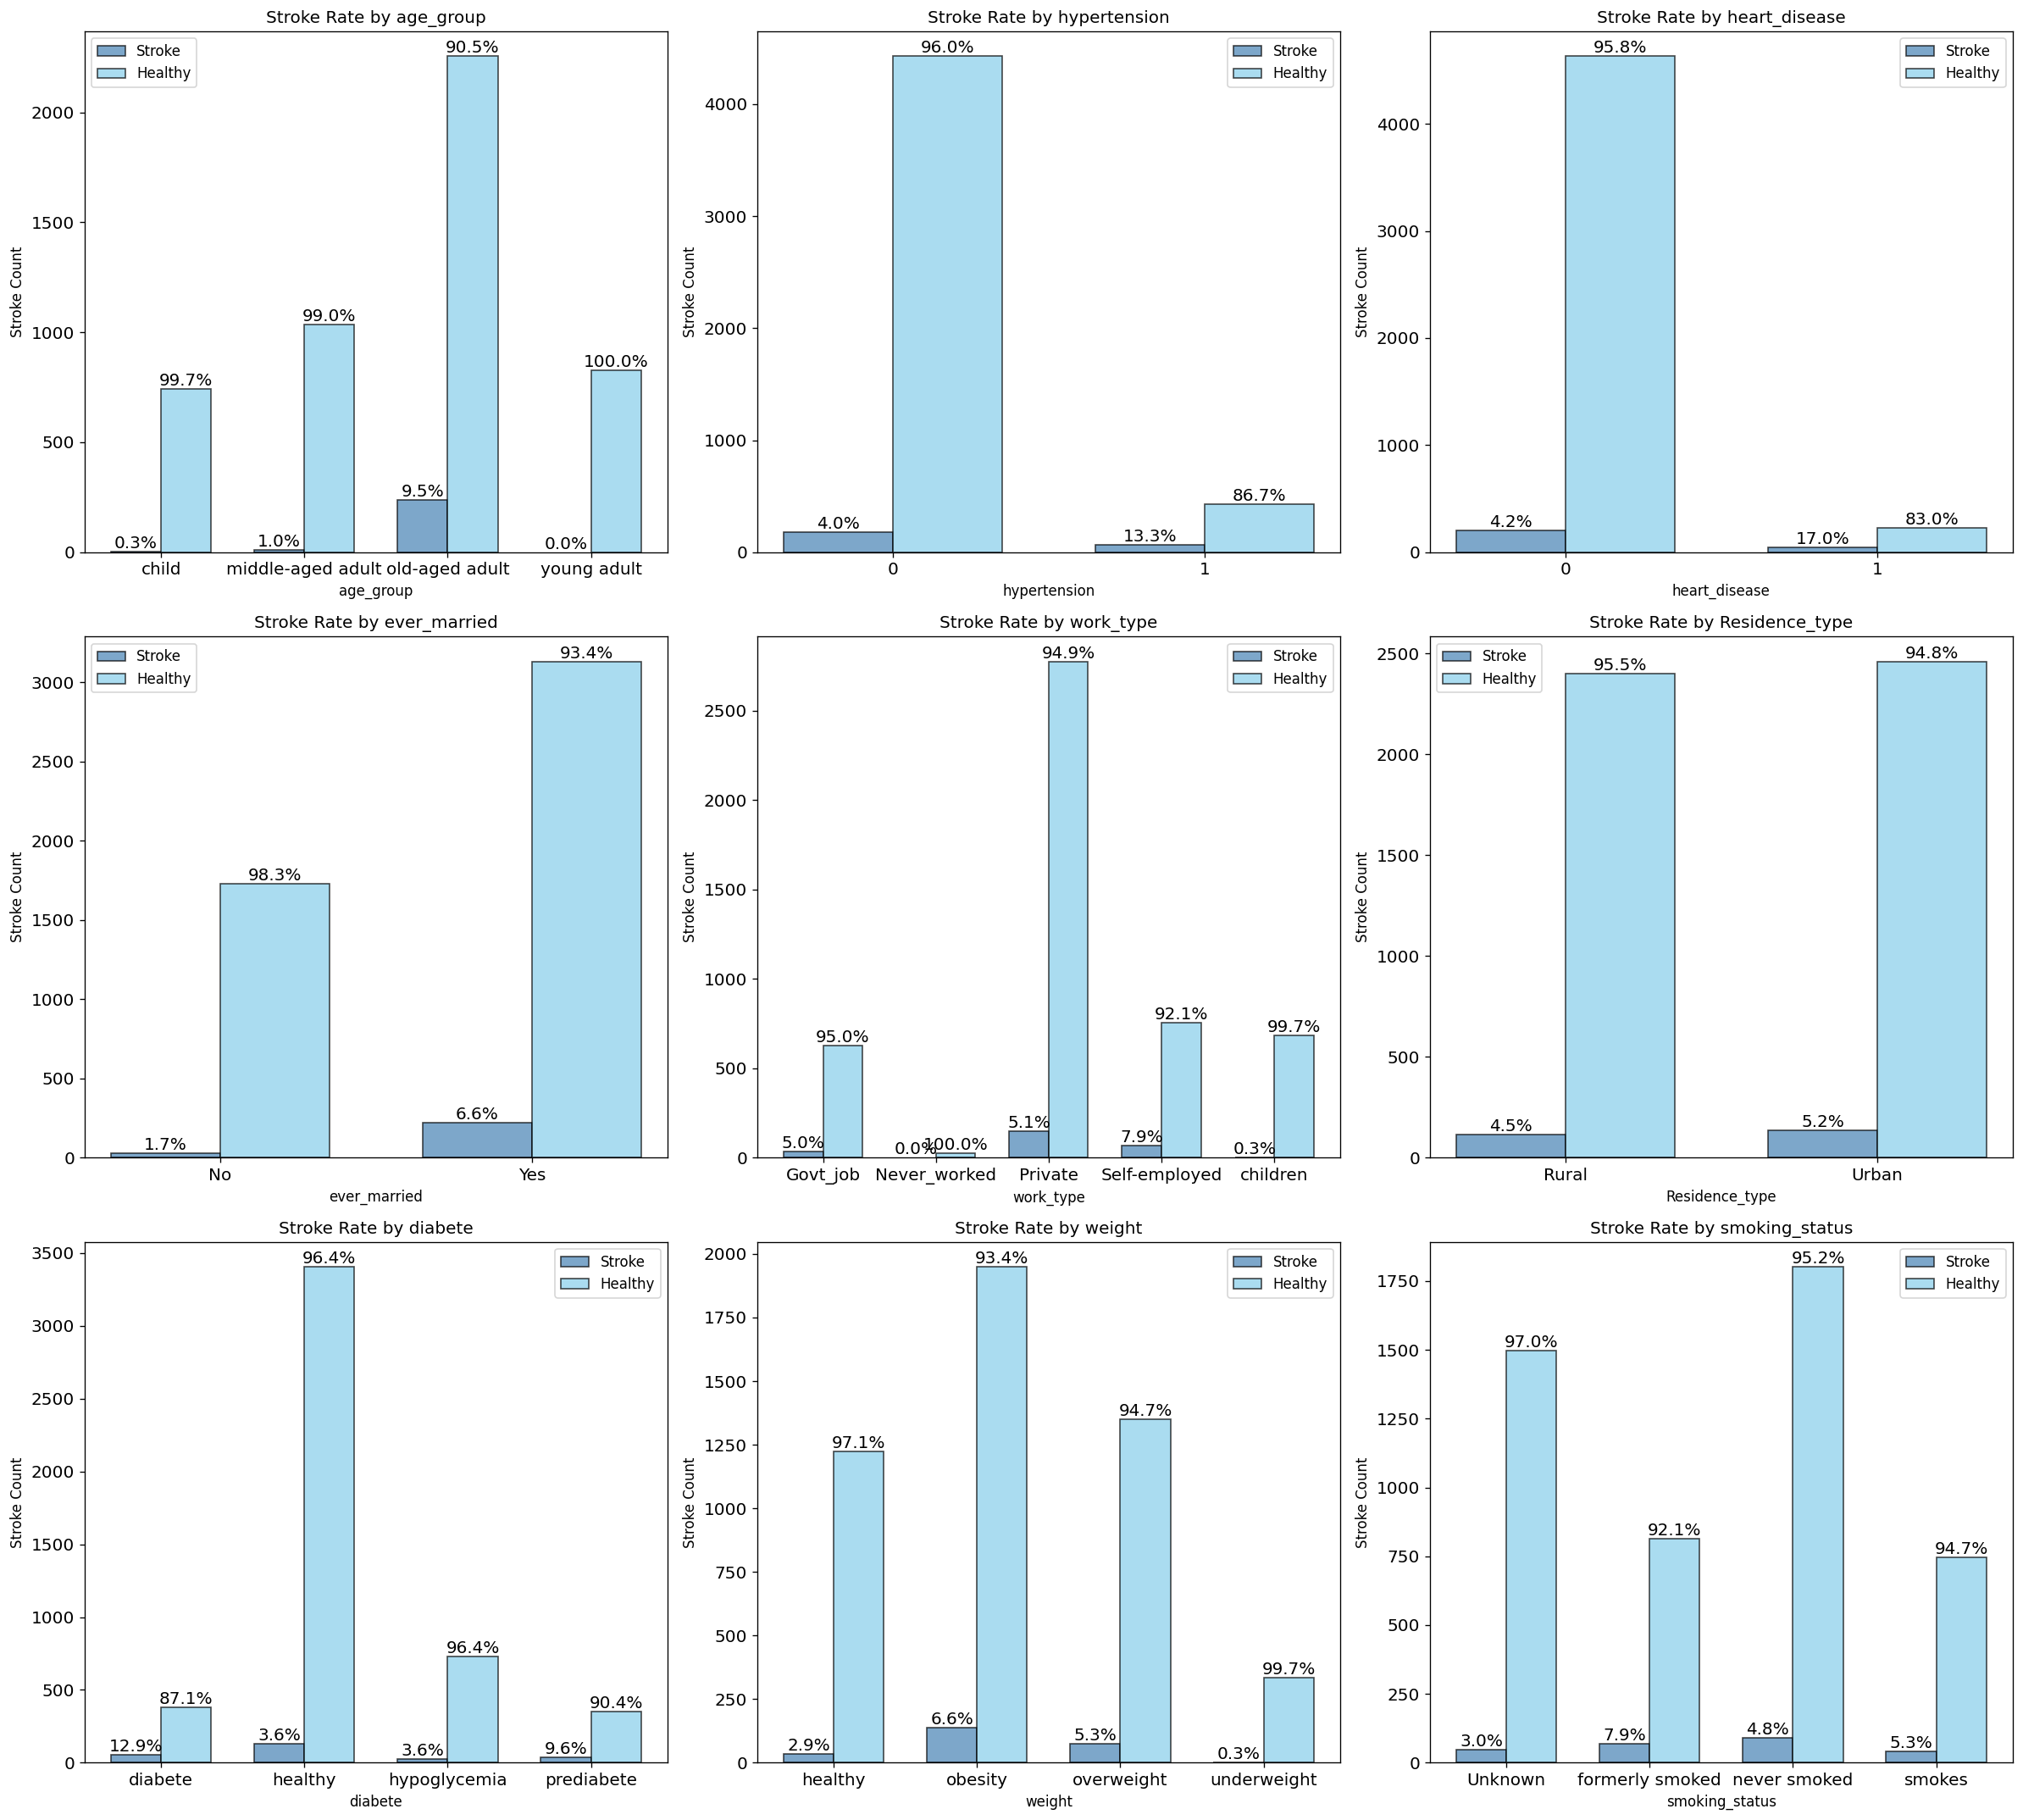

In [ ]:
#Stack bar plot
EDA_data = df.drop(columns = (['gender','stroke','age','avg_glucose_level','bmi']), inplace = False).columns.tolist()

# Tính toán số lượng hàng và cột trong ma trận subplot
num_plots = len(EDA_data)
import math
num_rows = math.ceil(num_plots / 3)
num_cols = min(num_plots, 3)

#Multiple bar plot:
fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 6*num_rows))

# Iterate through the columns in EDA_data
for i, column in enumerate(EDA_data):
    # Calculate the position of the subplot
    row = i // num_cols
    col = i % num_cols

    # Group and calculate the counts of stroke and healthy cases
    stroke_counts = df.groupby(column)['stroke'].value_counts().unstack()

    # Get the categories and counts for each category
    categories = stroke_counts.index.tolist()
    stroke_values = stroke_counts[1].tolist()
    healthy_values = stroke_counts[0].tolist()

    # Calculate the width for each bar
    bar_width = 0.35

    # Calculate the x positions for the bars
    x = np.arange(len(categories))

    # Plot the bars
    bars1 = axes[row, col].bar(x, stroke_values, width=bar_width, label='Stroke', color='steelblue', alpha=0.7, edgecolor='black', linewidth=1, capsize=5)
    bars2 = axes[row, col].bar(x + bar_width, healthy_values, width=bar_width, label='Healthy', color='skyblue', alpha=0.7, edgecolor='black', linewidth=1, capsize=5)

    # Add stroke percentage text on each bar
    for bar1, bar2 in zip(bars1, bars2):
        height1 = bar1.get_height()
        height2 = bar2.get_height()
        if math.isnan(height1):
            height1 = 0
        total = height1 + height2
        percentage1 = height1 / total * 100
        percentage2 = 100 - percentage1
        axes[row, col].text(bar1.get_x() + bar1.get_width() / 2, height1, f"{percentage1:.1f}%", ha='center', va='bottom', fontsize=12)
        axes[row, col].text(bar2.get_x() + bar2.get_width() / 2, height2, f"{percentage2:.1f}%", ha='center', va='bottom', fontsize=12)

    axes[row, col].set_xlabel(column)
    axes[row, col].set_ylabel('Stroke Count')
    axes[row, col].set_title(f"Stroke Rate by {column}")
    axes[row, col].set_xticks(x + bar_width / 2)
    axes[row, col].set_xticklabels(categories)
    axes[row, col].legend()
    axes[row, col].tick_params(axis='both', labelsize=12)

plt.tight_layout()
plt.show()

*   Biểu đồ age_group vs Stroke: đột quỵ xảy ra chủ yếu ở nhóm người già (old_aged) với tỷ lệ 9.47%, tiếp theo đó là lứa tuổi trung niên(middle_aged) với tỷ lệ 1%, trẻ em cũng có nguy cơ mắc đột quy dù rất nhỏ 0.27%, giới trẻ thì có tỷ lệ mắc bằng 0
* Biểu đồ hypertension vs stroke: tỷ lệ bị đột quỵ của những người từng bị tăng huyết áp(13.25%) cao hơn gấp 4 lần so với người không bị cao huyết áp(3.97%) có thể hiểu rằng: khi huyết áp cao mãn tính, các tế bào cơ trơn bị phì đại, phát triển vào bên trong, lấn vào lòng của động mạch, dẫn đến thu hẹp lòng mạch. Tăng huyết áp cũng dẫn đến chứng xơ cứng mạch máu, dẫn đến tăng áp lực mạch, trở thành một yếu tố dự báo đột quỵ.
* Biểu đồ heart_diease vs stroke: người từng mắc bệnh về tim mạch(17%)  có tỷ lệ đột quỵ cao gấp hơn 4 lần so với người khỏe mạnh(4.18%) có thể hiểu do Bệnh mạch vành(tim mạch) và đột quỵ cùng chung các yếu tố nguy cơ như nồng độ cholesterol LDL cao, nồng độ cholesterol “tốt” HDL thấp, huyết áp cao.
* Biểu đồ ever_maried vs stroke: người đã kết hôn (có tuổi) có khả năng đột quỵ cao hơn người chưa kết hôn (người trẻ độc thân)
* Biểu đồ work_type vs stroke: các nhóm người có nguy cơ mắc cao hơn các nhóm còn lại là self_employed(8%),  private(5%), govt_job(5%) đều là những nhóm người làm việc dưới áp lực cao, tần suất làm việc dày đặc, nhóm never_worked hoặc children có tỷ lệ thấp ~0%.
* Biểu đồ Residence_type vs stroke: nhóm người thành thị(Urban) có tỷ lệ mắc cao hơn đôi chút nhưng không đáng kể so với nhóm người nông thôn. Nguyên nhân có thể là vì ban ngày trời nóng, những người ở thành phố chịu hiệu ứng đô thị, dẫn đến nhiệt độ môi trường đô thị thường tăng cao hơn mức nhiệt thời tiết. Trong khi đó, vào ban đêm lại xảy ra hiện tượng “đảo nhiệt”, tức là nhiệt độ từ đường nhựa, bê tông phả ra ngoài, khiến cho nhiệt độ buổi tối giảm chậm hơn so với ở vùng nông thôn. Ngoài ra còn 1 số yếu tố khác như ô nhiễm không khí, mức độ ồn ào, tuổi tác, thu nhập, lối sống, tình trạng sức khỏe tổng quát và mức độ truy cập vào dịch vụ y tế.
* Biểu đồ diabete vs stroke: những người bị tiểu đường hoặc tiền tiểu đường có nguy cơ đột quỵ cao hơn so với nhóm người khỏe mạnh và đường huyết thấp. Chỉ số đường huyết tỷ lệ thuận với nguy cơ đột quy. Nguyên nhân có thể giải thích như sau: bệnh tiểu đường ảnh hưởng đến các mạch máu tại nhiều vị trí khác nhau và có thể dẫn đến đột quỵ nếu nó ảnh hưởng trực tiếp đến mạch máu não. Lượng đường dư thừa trong máu thúc đẩy quá trình tích tụ chất béo trong động mạch, hình thành các mảng xơ vữa, dẫn đến hình thành cục máu đông hoặc tắc nghẽn động mạch, gây ra đột quỵ.
* Biểu đồ weight vs stroke: Người bị thừa cân và béo phì có nguy cơ đột quỵ cao hơn người khỏe mạnh và người gầy. Ở những người bị béo phì, tim cần làm việc nhiều hơn để bơm máu đi khắp cơ thể. Điều này dẫn đến các bệnh tim mạch chuyển hóa, huyết áp cao, hoặc tăng huyết áp. Huyết áp cao là nguyên nhân dẫn đến đột quỵ.
* Biểu đồ smoking_status vs stroke: người hút thuốc và đã từng hút thuốc có tỷ lệ mắc cao hơn nhóm người chưa hút bao giờ. Hút thuốc nhiều trong một khoảng thời gian dài có thể dẫn đến cao huyết áp, khiến các mạch máu nuôi não bị tổn thương, đặc biệt là thành mạch máu. Lúc này các chất béo, canxi và các chất lắng đọng dễ bám vào thành mạch, làm tăng nguy cơ hình thành các mảng xơ vữa động mạch và cục máu đông trong lòng mạch. Hậu quả là làm hẹp, xơ cứng, tắc nghẽn mạch máu não và dẫn đến đột quỵ.

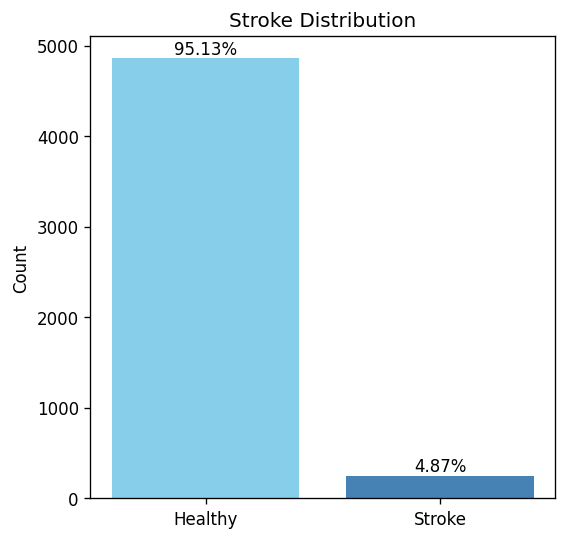

In [ ]:
fig, ax = plt.subplots(figsize=(5, 5))
total_count = len(df)
healthy_count = df[df['stroke'] == 0]['stroke'].count()
stroke_count = df[df['stroke'] == 1]['stroke'].count()
healthy_percent = round((healthy_count / total_count) * 100,2)
stroke_percent = round((stroke_count / total_count) * 100,2)

x = ['Healthy', 'Stroke']
y = [healthy_count, stroke_count]
z = [healthy_percent, stroke_percent]
colors = ['skyblue', 'steelblue']
ax.bar(x, y, color=colors)
for i, v in enumerate(y):
    ax.text(i, v + 5, str(z[i]) + '%', ha='center', va='bottom')
ax.set_ylabel('Count')
ax.set_title('Stroke Distribution')
plt.show()

Dữ liệu bị mất cân bằng cần xử lý data bằng cách xử dụng Over Sampling hoặc Under Sampling để đạt được mô hình tốt nhất

array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'hypertension'}>],
       [<Axes: title={'center': 'heart_disease'}>,
        <Axes: title={'center': 'avg_glucose_level'}>],
       [<Axes: title={'center': 'bmi'}>,
        <Axes: title={'center': 'stroke'}>]], dtype=object)

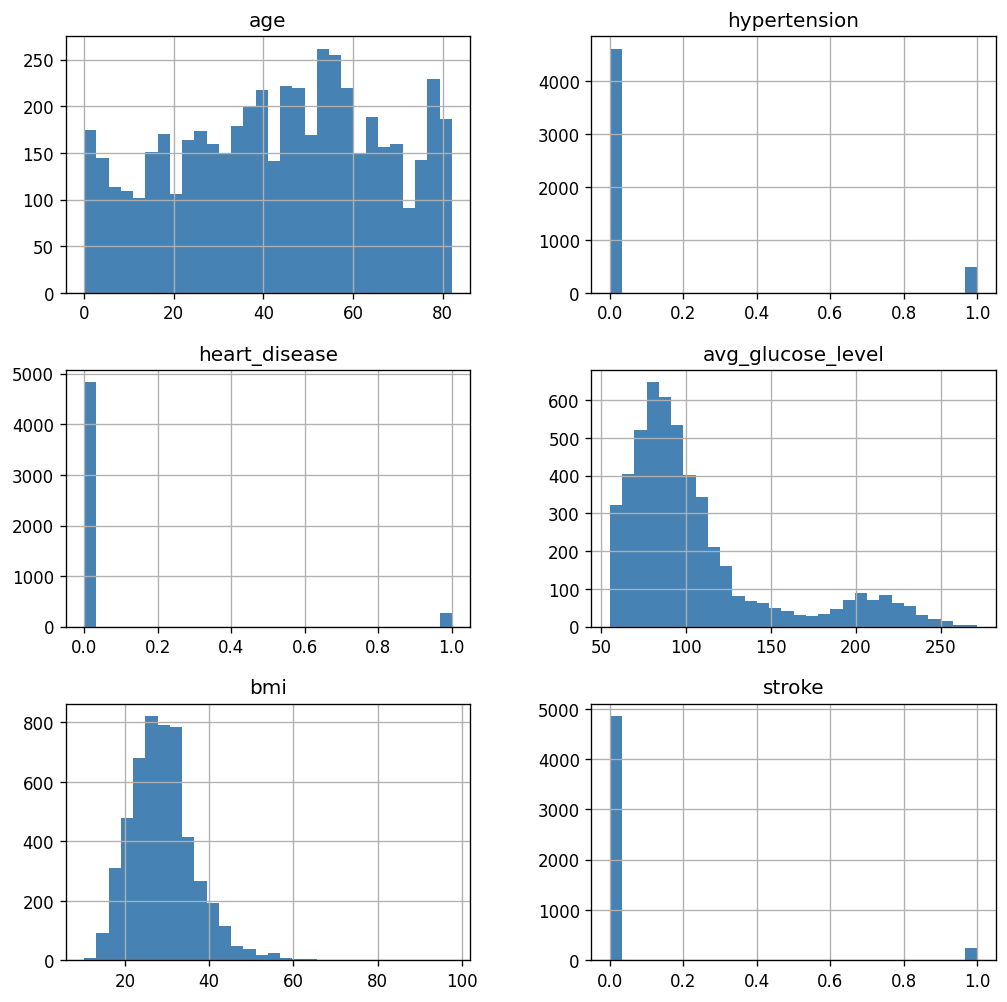

In [ ]:
# Biểu đồ phân bố của các cột
df.hist(figsize = (10,10), bins = 30, color = 'steelblue')

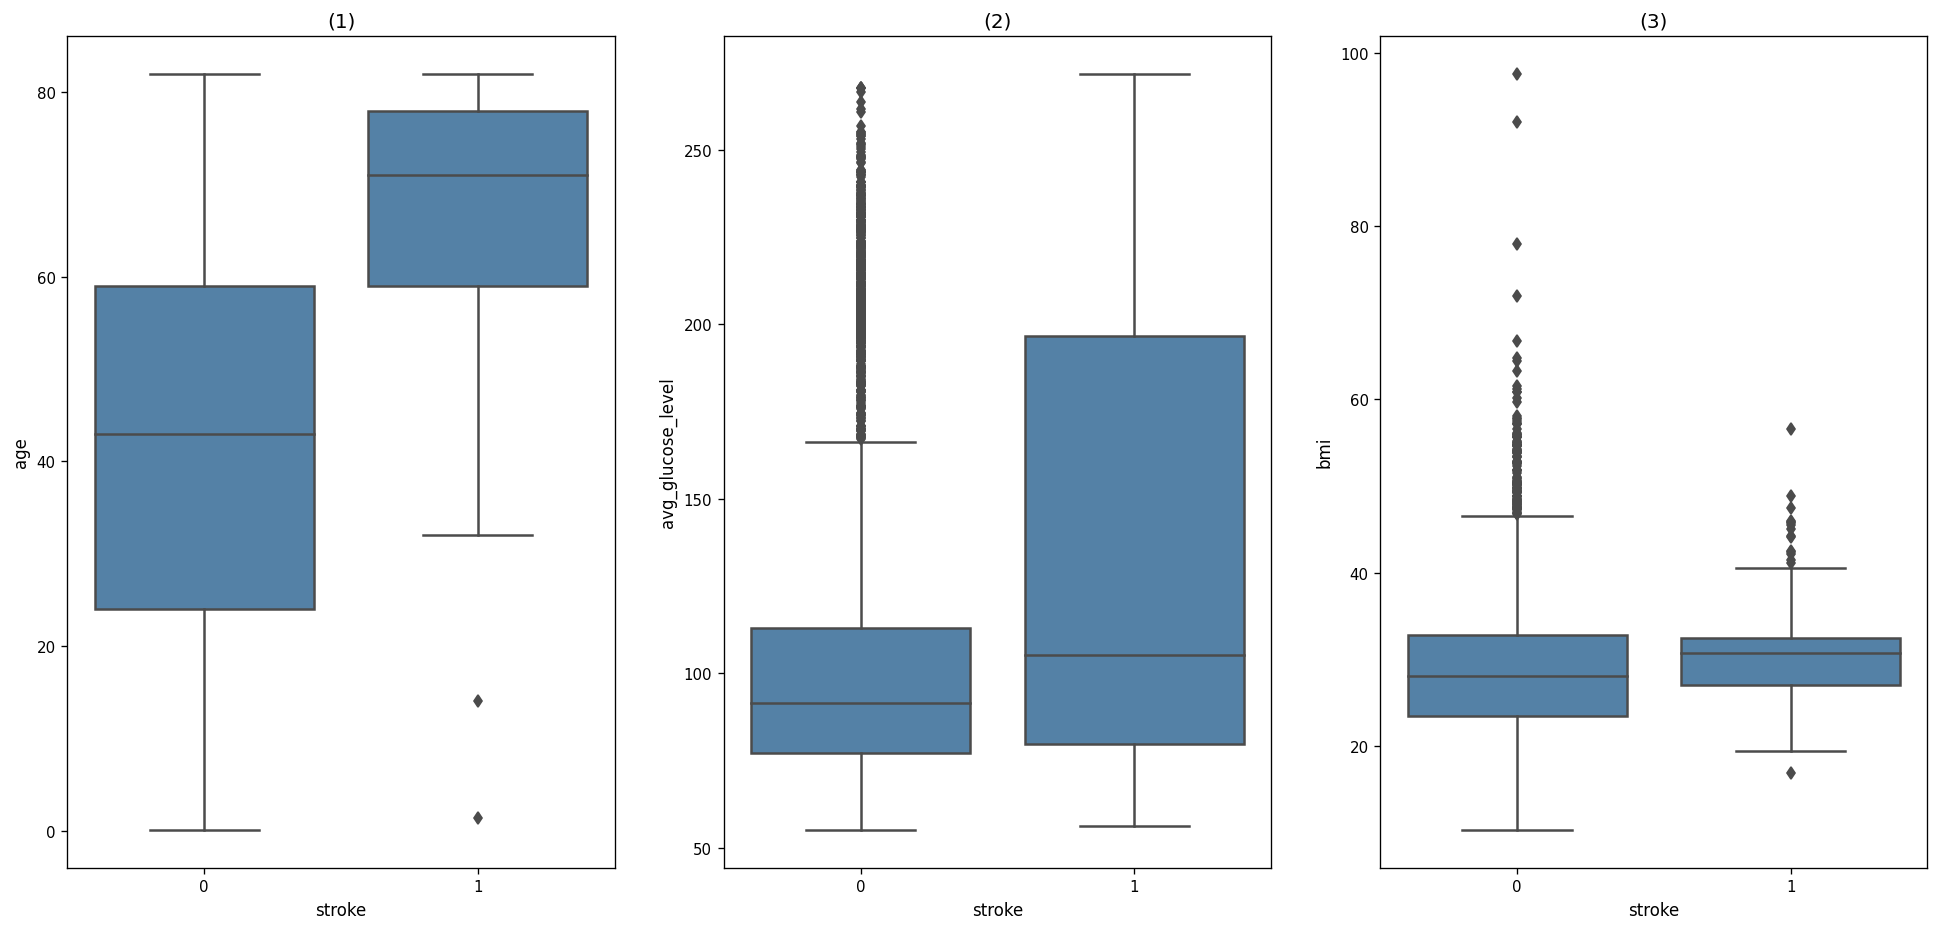

In [ ]:
# biểu đồ kiểm tra giá trị outliner
plt.figure(figsize=(20,9))

plt.subplot(1,3,1)
sns.boxplot(x = df['stroke'], y = df['age'], color = 'steelblue')
plt.title('age')
plt.title('(1)')
plt.tick_params(axis='both', labelsize=9)

plt.subplot(1,3,2)
sns.boxplot(x = df['stroke'], y = df['avg_glucose_level'], color = 'steelblue')
plt.title('avg_glucose_level')
plt.title('(2)')
plt.tick_params(axis='both', labelsize=9)

plt.subplot(1,3,3)
sns.boxplot(x = df['stroke'], y = df['bmi'], color = 'steelblue')
plt.title('bmi')
plt.title('(3)')
plt.tick_params(axis='both', labelsize=9)

* Outlier chủ yếu ở nhóm không bị đột quỵ

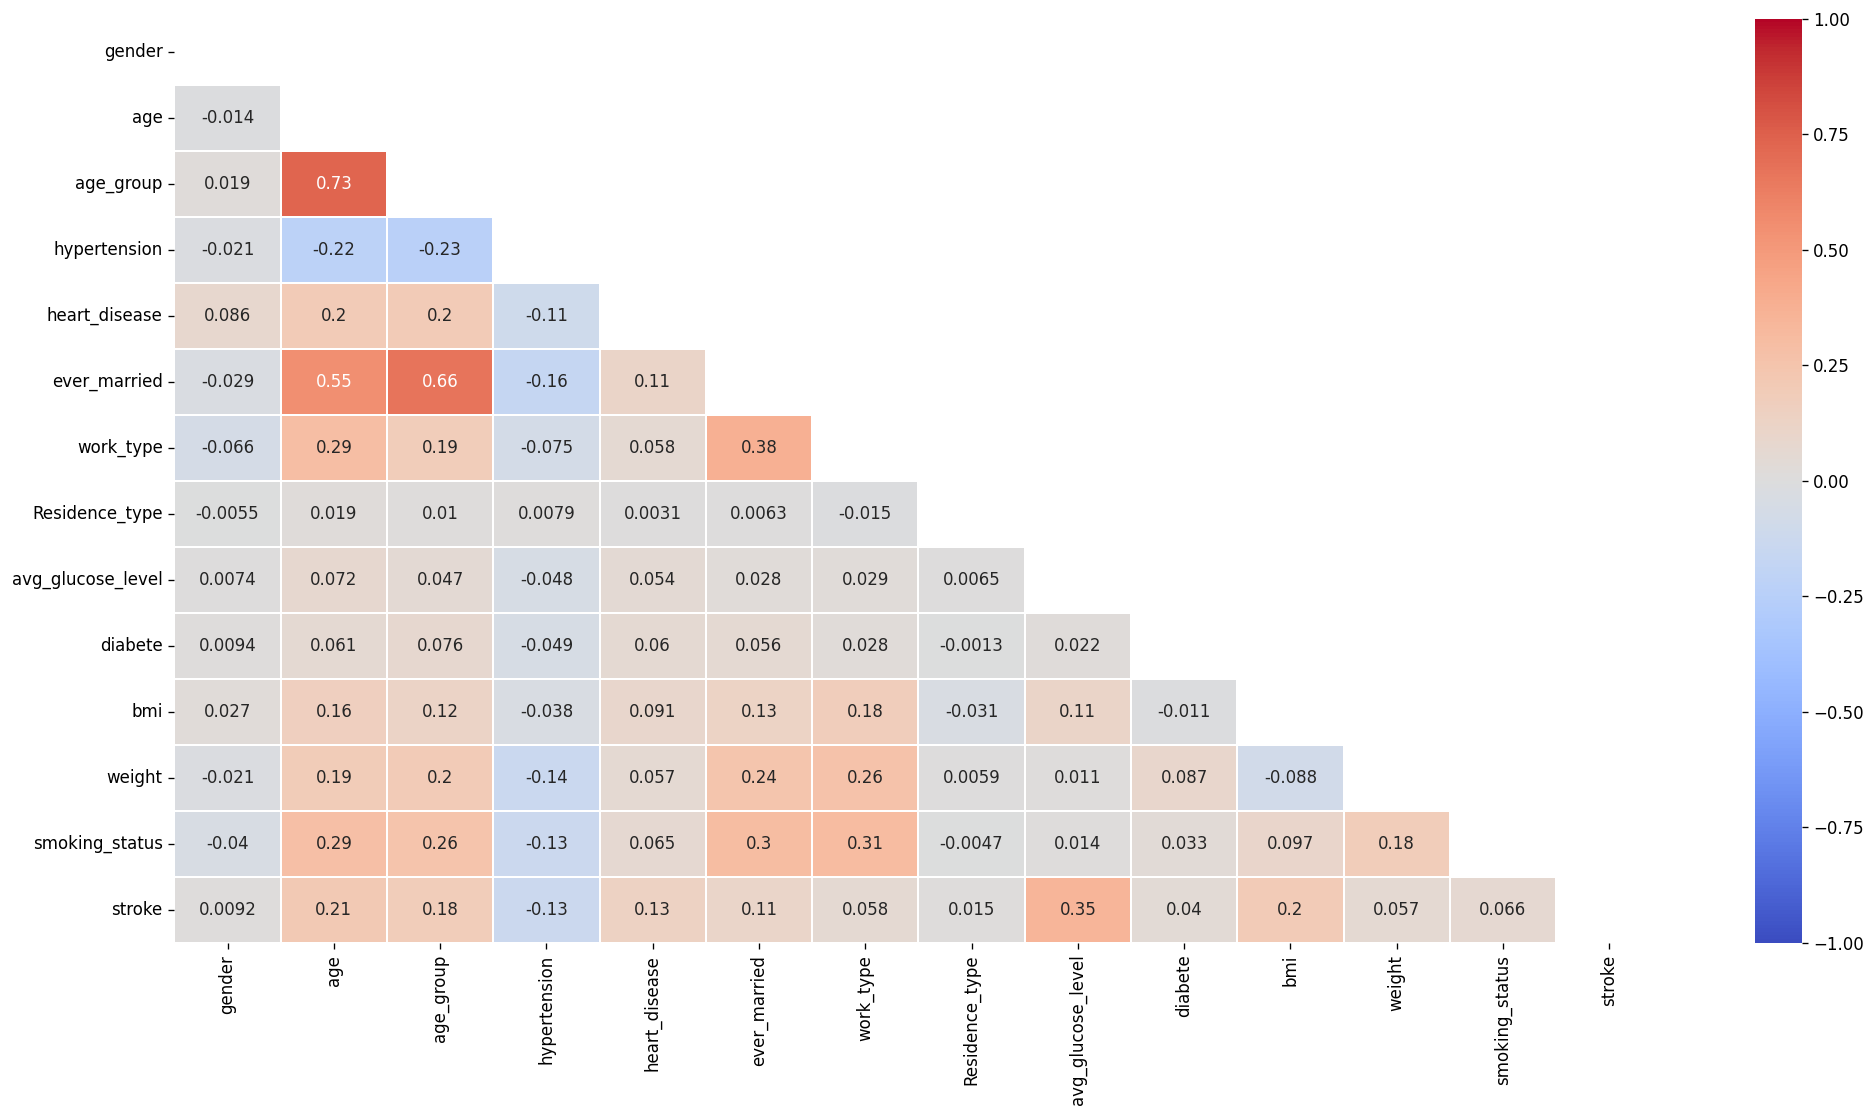

In [ ]:
#Corr
plt.figure(figsize=(20, 10))
corr = df.apply(lambda x: pd.factorize(x)[0]).corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
ax = sns.heatmap(corr, mask=mask, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, linewidths=.2, cmap='coolwarm', vmin=-1, vmax=1)

* Nguy cơ đột quỵ có tương quan cao với độ tuổi, huyết áp, bệnh tim mạch, lượng đường huyết và chỉ số khối cơ thể (BMI)

# Mã hóa dữ liệu chuẩn bị cho bước xây dựng mô hình dự báo

In [ ]:
df.head(5)

,gender,age,age_group,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,diabete,bmi,weight,smoking_status,stroke
0,Male,67.0,old-aged adult,0,1,Yes,Private,Urban,228.69,diabete,36.600000,obesity,formerly smoked,1
1,Female,61.0,old-aged adult,0,0,Yes,Self-employed,Rural,202.21,diabete,30.745428,obesity,never smoked,1
2,Male,80.0,old-aged adult,0,1,Yes,Private,Rural,105.92,healthy,32.500000,obesity,never smoked,1
3,Female,49.0,old-aged adult,0,0,Yes,Private,Urban,171.23,prediabete,34.400000,obesity,smokes,1
4,Female,79.0,old-aged adult,1,0,Yes,Self-employed,Rural,174.12,prediabete,24.000000,healthy,never smoked,1


In [ ]:
df['gender'].unique()

array(['Male', 'Female', 'Other'], dtype=object)

In [ ]:
df['age_group'].unique()

array(['old-aged adult', 'middle-aged adult', 'child', 'young adult'],
      dtype=object)

In [ ]:
df['ever_married'].unique()

array(['Yes', 'No'], dtype=object)

In [ ]:
df['work_type'].unique()

array(['Private', 'Self-employed', 'Govt_job', 'children', 'Never_worked'],
      dtype=object)

In [ ]:
df["Residence_type"].unique()

array(['Urban', 'Rural'], dtype=object)

In [ ]:
df["diabete"].unique()

array(['diabete', 'healthy', 'prediabete', 'hypoglycemia'], dtype=object)

In [ ]:
df["weight"].unique()

array(['obesity', 'healthy', 'overweight', 'underweight'], dtype=object)

In [ ]:
df['smoking_status'].unique()

array(['formerly smoked', 'never smoked', 'smokes', 'Unknown'],
      dtype=object)

In [ ]:
#Mã hoá data cho bước xây dựng mô hình
df.replace(to_replace = ['Other','Male', 'Female'], value = [0,1,2], inplace = True)
df.replace(to_replace = ['child','young adult','middle-aged adult','old-aged adult'], value = [0,1,2,3], inplace = True)
df.replace(to_replace = ['Yes', 'No'], value = [1,0], inplace = True)
df.replace(to_replace = ['Never_worked','children','Private','Self-employed','Govt_job'], value = [0,1,2,3,4], inplace = True)
df.replace(to_replace = ['Urban', 'Rural'], value = [1,0], inplace = True)
df.replace(to_replace = ['hypoglycemia','healthy', 'prediabete','diabete'], value = [0,1,2,3], inplace = True)
df.replace(to_replace = ['underweight','healthy','overweight','obesity'], value = [0,1,2,3], inplace = True)
df.replace(to_replace = ['Unknown','never smoked', 'formerly smoked', 'smokes'], value = [0,1,2,3], inplace = True)
df.sample(5)

,gender,age,age_group,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,diabete,bmi,weight,smoking_status,stroke
1662,2,52.0,3,0,0,1,4,0,69.11,0,35.2,3,1,0
2542,1,14.0,0,0,0,0,1,1,101.87,1,20.3,1,1,0
1854,2,68.0,3,0,0,1,3,0,93.61,1,24.9,1,1,0
378,2,14.0,0,0,0,0,1,0,72.36,1,20.5,1,0,0
2151,1,25.0,1,0,0,1,2,0,93.88,1,24.3,1,3,0


In [ ]:
#Cách 2: dùng LabelEncoder
#Chọn data object để mã hóa
#selected_columns = df.select_dtypes(include=['object'])
#Mã hóa bằng LabelEncoder
#from sklearn.preprocessing import LabelEncoder
#label_encoder = LabelEncoder()
#for column in selected_columns.columns:
   #df[column] = label_encoder.fit_transform(df[column])

# Phần 4.1: dự báo với toàn bộ dữ liệu

# Model_1: Logicstic regression

In [ ]:
df['stroke'].value_counts()

0    4861
1     249
Name: stroke, dtype: int64

In [ ]:
#Chọn dữ liệu X và y
X = df.drop(['stroke', 'age', 'avg_glucose_level', 'bmi'],axis='columns',inplace=False) # không dùng cột stroke
y = df['stroke']
#Chia dữ liệu thành training set và test set
from sklearn.model_selection import train_test_split # Thư viện hỗ trợ chia data thành train và test set
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=0) # Chia dữ liệu với 30% số lượng là tets và 70% số lượng là training

In [ ]:
#Xây dựng mô hình logicstics regression
from sklearn.linear_model import LogisticRegression #import thư viện
#1 Import mô hình LogisticRegression gán cho biến "model"
model = LogisticRegression()
#2.Training model với training set
model.fit(X_train, y_train) #Training model
#3.In ra thông tin của mô hình y=ax+b với a là độ dốc (model.coef_), b là intercept (model.intercept_)
print('a=',model.coef_)
print('b=',model.intercept_)

a= [[-0.01263899  2.19693086  0.4482854   0.88377271 -0.50485533 -0.12202328
   0.29488786  0.19617076  0.02009258 -0.06981582]]
b= [-8.6638126]


In [ ]:
# Giả sử dự báo điểm bất kì
print(model.predict([[1,3,1,0,1,1,1,2,3,2]]))
print(model.predict_proba([[1,3,1,0,1,1,1,2,3,2]]))
# Vậy ta dự đoán được người nam, trung niên, có bệnh huyết áp, không bệnh tim, đã kết hôn, không bao giờ đi làm, ở thành phố, có bệnh tiểu đường, dư cân, từng hút thuốc
# thì chưa có nguy cơ đột quỵ

[0]
[[0.83975102 0.16024898]]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [ ]:
y_pred = model.predict(X_test) #Dự báo cho tập test
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
#Đánh giá mô hình bằng chỉ số accuracy_score
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred) #Tính độ chính xác của mô hình
print('Độ chính xác của mô hình:', accuracy_score(y_test, y_pred))

Độ chính xác của mô hình: 0.9504240052185258


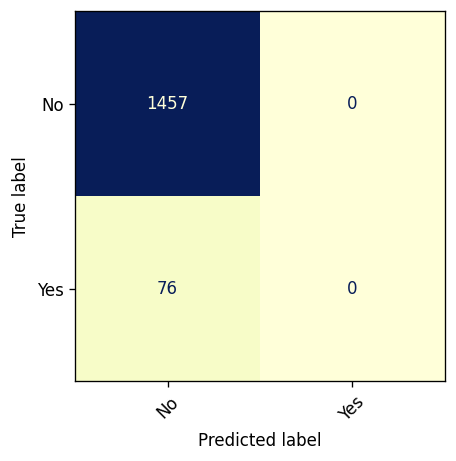

In [ ]:
#Đánh giá mô hình bằng confusion matrix
import seaborn as sns
from sklearn.metrics import confusion_matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
fig, ax = plt.subplots(figsize=(4, 4))
labels = ['No', 'Yes']#Tên class
ConfusionMatrixDisplay.from_predictions(
    y_test, y_pred, display_labels=labels, xticks_rotation = 45,
    ax=ax, colorbar = False, cmap="YlGnBu")

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97      1457
           1       0.00      0.00      0.00        76

    accuracy                           0.95      1533
   macro avg       0.48      0.50      0.49      1533
weighted avg       0.90      0.95      0.93      1533



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Người không bị bệnh dự báo không mắc bệnh là 1457 người, và không dự báo sai
# Người bị bệnh dự báo không bệnh 76 người => dự báo sai về class =1

# Model_2: decision Tree

In [ ]:
#Chọn dữ liệu X và y
X = df.drop(['stroke', 'age', 'avg_glucose_level', 'bmi'],axis='columns',inplace=False) # không dùng cột stroke
y = df['stroke']
#Chia dữ liệu thành training set và test set
from sklearn.model_selection import train_test_split # Thư viện hỗ trợ chia data thành train và test set
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=0) # Chia dữ liệu với 30% số lượng là tets và 70% số lượng là training

In [ ]:
from sklearn import tree #Gọi mô hình và training
model_tree = tree.DecisionTreeClassifier(max_depth = 5)  #Set max_depth bất kỳ
model_tree.fit(X_train, y_train) #Training mô hình

DecisionTreeClassifier(max_depth=5)

In [ ]:
#Đánh giá độ chính xác của mô hình
y_pred=model_tree.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred) #Độ chính xác của DT

print('Độ chính xác của mô hình:', accuracy_score(y_test, y_pred))

Độ chính xác của mô hình: 0.9497716894977168


In [ ]:
# Sử dụng vòng lặp for để tìm max_depth
score_total=[]
for i in range(1,10):
  model_tree = tree.DecisionTreeClassifier(max_depth=i)
  model_tree.fit(X_train, y_train)
  y_pred=model_tree.predict(X_test)
  score_total.append(accuracy_score(y_test,y_pred)*100)

In [ ]:
score_total

[95.04240052185257,
 95.04240052185257,
 95.04240052185257,
 94.97716894977168,
 94.97716894977168,
 94.97716894977168,
 94.97716894977168,
 94.9119373776908,
 94.78147423352902]

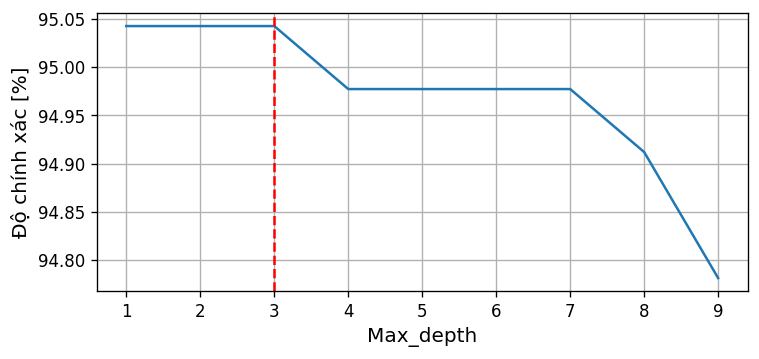

In [ ]:
#Vẽ hình thể hiện độ chính xác theo giá trị max_depth
plt.rcParams.update({'figure.figsize':(7,3), 'figure.dpi':120})
plt.ylabel('Độ chính xác [%]',fontsize=12)
plt.xlabel('Max_depth',fontsize=12)
plt.plot(range(1, 10), score_total)
plt.xticks(range(1, 10))
plt.axvline(x = 3, color='r', linestyle='--')
plt.grid('minor')

In [ ]:
# Vẽ lại cây quyết định như sau:
from sklearn import tree
model = tree.DecisionTreeClassifier(max_depth=3)
model = model.fit(X_train, y_train)#Tính toán/fit model

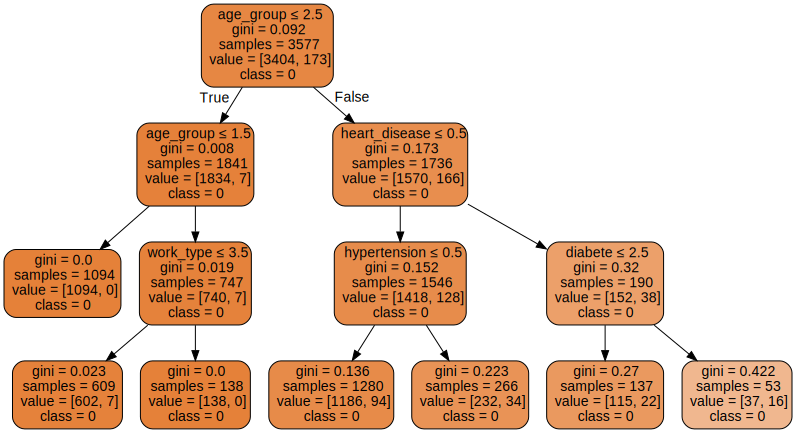

In [ ]:
import graphviz #Thư viện để hiển thị hình ảnh
dot_data = tree.export_graphviz(model, out_file=None,feature_names=['gender','age_group','hypertension','heart_disease','ever_married','work_type','Residence_type','diabete','weight','smoking_status'],class_names=['0','1'],filled=True, rounded = True, special_characters=True)
graph = graphviz.Source(dot_data)
graph

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97      1457
           1       0.33      0.05      0.09        76

    accuracy                           0.95      1533
   macro avg       0.64      0.52      0.53      1533
weighted avg       0.92      0.95      0.93      1533



# Model_3: Mô hình random forest

In [ ]:
#Chọn dữ liệu X và y
X = df.drop(['stroke', 'age', 'avg_glucose_level', 'bmi'],axis='columns',inplace=False) # không dùng cột stroke
y = df['stroke']
#Chia dữ liệu thành training set và test set
from sklearn.model_selection import train_test_split # Thư viện hỗ trợ chia data thành train và test set
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=0) # Chia dữ liệu với 30% số lượng là tets và 70% số lượng là training

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=3)
rf.fit(X_train, y_train)
y_pred=rf.predict(X_test)
accuracy_score(y_test,y_pred)
print('Độ chính xác của mô hình:', accuracy_score(y_test, y_pred))

Độ chính xác của mô hình: 0.9367253750815394


In [ ]:
y_pred = model.predict(X_test) #Dự báo cho tập test
y_pred

array([0, 0, 0, ..., 0, 0, 0])

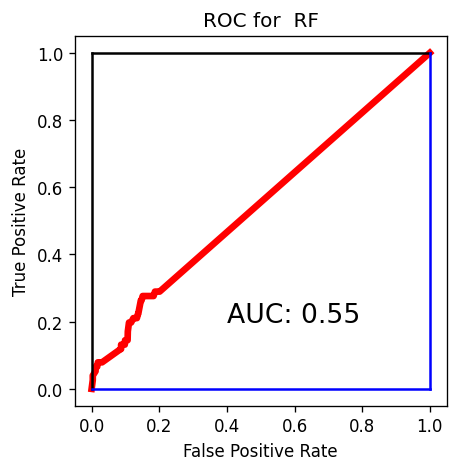

In [ ]:
from sklearn.metrics import roc_auc_score,roc_curve
y_probabilities = rf.predict_proba(X_test)[:,1] #Thay tên model phù hợp
false_positive_rate, true_positive_rate, threshold = roc_curve(y_test,y_probabilities)
plt.figure(figsize=(4,4))
plt.title('ROC for  RF')
plt.plot(false_positive_rate, true_positive_rate, linewidth=4, color='red')
#plt.plot([0,1],ls='--',linewidth=5)
plt.plot([0,0],[1,0],c='0')
plt.plot([1,1],c='0')
plt.plot([0,0],c='b')
plt.plot([1,1],[1,0],c='b')
plt.text(0.4,0.2,'AUC: {:.2f}'.format(roc_auc_score(y_test,y_probabilities)),size= 16)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97      1457
           1       0.00      0.00      0.00        76

    accuracy                           0.95      1533
   macro avg       0.48      0.50      0.49      1533
weighted avg       0.90      0.95      0.93      1533



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Xử lý Hyperparameters random forest

In [ ]:
#Chọn dữ liệu X và y
X = df.drop(['stroke', 'age', 'avg_glucose_level', 'bmi'],axis='columns',inplace=False) # không dùng cột stroke
y = df['stroke']
#Chia dữ liệu thành training set và test set
from sklearn.model_selection import train_test_split # Thư viện hỗ trợ chia data thành train và test set
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=0) # Chia dữ liệu với 30% số lượng là tets và 70% số lượng là training

In [ ]:
#hyperparameters turning
#from sklearn.model_selection import RandomizedSearchCV
rf = RandomForestClassifier()
from sklearn.model_selection import GridSearchCV
grid_space = {'max_depth':[1,2,3,4,5,6,7,8,9,10, None],
              'n_estimators':[5, 10, 15, 20, 25, 30],
              'criterion':['gini','entropy'],
              }
rf_grid = GridSearchCV(rf, param_grid=grid_space, scoring='accuracy')
model_grid = rf_grid.fit(X_train, y_train)

In [ ]:
model_grid.best_params_

{'criterion': 'entropy', 'max_depth': 5, 'n_estimators': 5}

In [ ]:
y_pred=model_grid.predict(X_test)
accuracy_score(y_test,y_pred)

0.9497716894977168

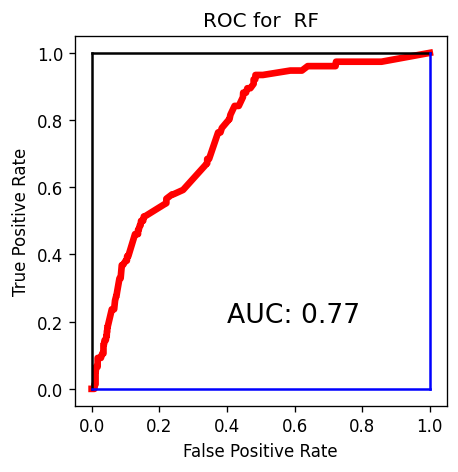

In [ ]:
from sklearn.metrics import roc_auc_score,roc_curve
y_probabilities = model_grid.predict_proba(X_test)[:,1]
false_positive_rate, true_positive_rate, threshold = roc_curve(y_test,y_probabilities)
plt.figure(figsize=(4,4))
plt.title('ROC for  RF')
plt.plot(false_positive_rate, true_positive_rate, linewidth=4, color='red')
#plt.plot([0,1],ls='--',linewidth=5)
plt.plot([0,0],[1,0],c='0')
plt.plot([1,1],c='0')
plt.plot([0,0],c='b')
plt.plot([1,1],[1,0],c='b')
plt.text(0.4,0.2,'AUC: {:.2f}'.format(roc_auc_score(y_test,y_probabilities)),size= 16)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97      1457
           1       0.00      0.00      0.00        76

    accuracy                           0.95      1533
   macro avg       0.48      0.50      0.49      1533
weighted avg       0.90      0.95      0.93      1533



# Model_4: Mô hình KNN

In [ ]:
#Chọn dữ liệu X và y
X = df.drop(['stroke', 'age', 'avg_glucose_level', 'bmi'],axis='columns',inplace=False) # không dùng cột stroke
y = df['stroke']
#Chia dữ liệu thành training set và test set
from sklearn.model_selection import train_test_split # Thư viện hỗ trợ chia data thành train và test set
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=0) # Chia dữ liệu với 30% số lượng là tets và 70% số lượng là training

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
model_knn = KNeighborsClassifier(n_neighbors = 5) #Dữ liệu đơn giản chúng ta có thể lựa chọn n_neighbors với giá trị nhỏ vẫn đảm bảo độ chính xác
model_knn.fit(X_train,y_train)#Training

KNeighborsClassifier()

In [ ]:
y_pred=model_knn.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
#Đánh giá độ chính xác của mô hình
model_knn.score(X_test,y_test)

0.9471624266144814

In [ ]:
import seaborn as sns
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[1451,    6],
       [  75,    1]])

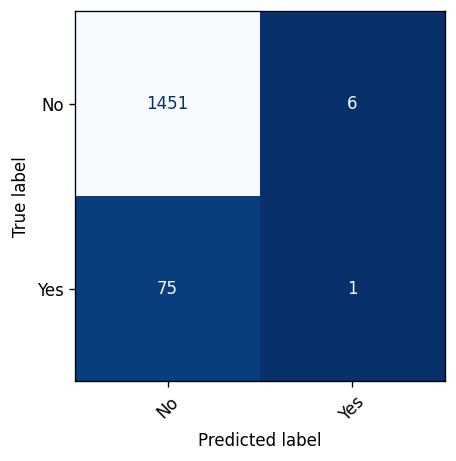

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
fig, ax = plt.subplots(figsize=(4, 4))
labels = ['No', 'Yes']#Tên class
ConfusionMatrixDisplay.from_predictions(
    y_test, y_pred, display_labels=labels, xticks_rotation=45,
    ax=ax, colorbar=False, cmap="Blues_r")

In [ ]:
# Thử chọn các giá trị n_neighbors cao hơn xem độ chính xác có được nâng cao hay không
ac=[] #Tạo list rỗng chứa giá trị của độ chính xác
for k in range (2,20,1):
  knn = KNeighborsClassifier(n_neighbors=k)
  knn.fit(X_train, y_train)
  y_pred = knn.predict(X_test)
  ac.append(metrics.accuracy_score(y_test, y_pred))
  print("Accuracy at k =",k,metrics.accuracy_score(y_test, y_pred))

Accuracy at k = 2 0.949119373776908
Accuracy at k = 3 0.9412915851272016
Accuracy at k = 4 0.9504240052185258
Accuracy at k = 5 0.9471624266144814
Accuracy at k = 6 0.9504240052185258
Accuracy at k = 7 0.9497716894977168
Accuracy at k = 8 0.9504240052185258
Accuracy at k = 9 0.9504240052185258
Accuracy at k = 10 0.9504240052185258
Accuracy at k = 11 0.9504240052185258
Accuracy at k = 12 0.9504240052185258
Accuracy at k = 13 0.9504240052185258
Accuracy at k = 14 0.9504240052185258
Accuracy at k = 15 0.9504240052185258
Accuracy at k = 16 0.9504240052185258
Accuracy at k = 17 0.9504240052185258
Accuracy at k = 18 0.9504240052185258
Accuracy at k = 19 0.9504240052185258


In [ ]:
len(ac)

18

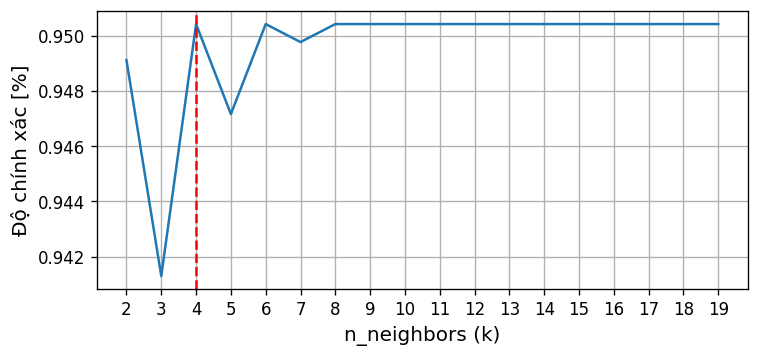

In [ ]:
#Vẽ hình thể hiện độ chính xác theo giá trị n_neighbors
plt.ylabel('Độ chính xác [%]',fontsize=12)
plt.xlabel('n_neighbors (k)',fontsize=12)
plt.plot(range(2, 20), ac)
plt.xticks(range(2, 20))
plt.axvline(x=4, color='r', linestyle='--')
plt.grid('minor')
#Có thể chọn n_neighbors bằng 4 để có kết quả tốt nhất

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
model_knn = KNeighborsClassifier(n_neighbors = 4) #Dữ liệu đơn giản chúng ta có thể lựa chọn n_neighbors với giá trị nhỏ vẫn đảm bảo độ chính xác
model_knn.fit(X_train,y_train)#Training

KNeighborsClassifier(n_neighbors=4)

In [ ]:
y_pred=model_knn.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
#Đánh giá độ chính xác của mô hình
model_knn.score(X_test,y_test)

0.9504240052185258

In [ ]:
import seaborn as sns
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[1457,    0],
       [  76,    0]])

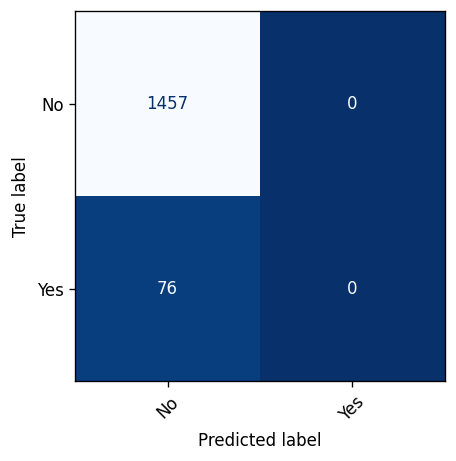

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
fig, ax = plt.subplots(figsize=(4, 4))
labels = ['No', 'Yes']#Tên class
ConfusionMatrixDisplay.from_predictions(
    y_test, y_pred, display_labels=labels, xticks_rotation=45,
    ax=ax, colorbar=False, cmap="Blues_r")

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97      1457
           1       0.00      0.00      0.00        76

    accuracy                           0.95      1533
   macro avg       0.48      0.50      0.49      1533
weighted avg       0.90      0.95      0.93      1533



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Model_5: Support Vector Machine


In [ ]:
#Chọn dữ liệu X và y
X = df.drop(['stroke', 'age', 'avg_glucose_level', 'bmi'],axis='columns',inplace=False) # không dùng cột stroke
y = df['stroke']
#Chia dữ liệu thành training set và test set
from sklearn.model_selection import train_test_split # Thư viện hỗ trợ chia data thành train và test set
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=0) # Chia dữ liệu với 30% số lượng là tets và 70% số lượng là training

In [ ]:
#Xây dựng mô hình
from sklearn.svm import SVC
model = SVC(kernel='linear', C= 0.001, gamma=0.0001) # Sử dụng Linear Kernel
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [ ]:
#Đánh giá độ chính xác của mô hình
from sklearn import metrics
from sklearn.metrics import classification_report
metrics.accuracy_score(y_test, y_pred)

0.9504240052185258

In [ ]:
#In ra báo cáo đánh giá của mô hình
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97      1457
           1       0.00      0.00      0.00        76

    accuracy                           0.95      1533
   macro avg       0.48      0.50      0.49      1533
weighted avg       0.90      0.95      0.93      1533



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


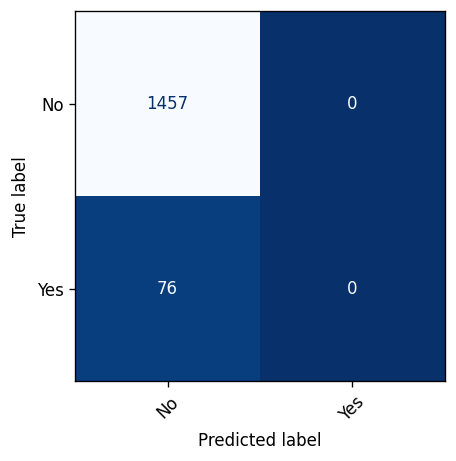

In [ ]:
#Vẽ confusion matrix theo hàm plot có sẵn
#plot_confusion_matrix(model, X_test, y_test)
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
fig, ax = plt.subplots(figsize=(4, 4))
labels = ['No', 'Yes']#Tên class
ConfusionMatrixDisplay.from_predictions(
    y_test, y_pred, display_labels=labels, xticks_rotation=45,
    ax=ax, colorbar=False, cmap="Blues_r")

# tạo bảng thống kê kết của các mô hình trên

In [ ]:
data_scores_models = [
            ('1','logictis_reg', 0.95,1.00,0.97,0.00,0.00,0.00,0.95),
            ('2','Decision_tree', 0.95,1.00,0.97,0.36,0.05,0.09,0.95),
            ('3','Random_forest', 0.95,0.98,0.97,0.12,0.08,0.07,0.93),
            ('4','KNN', 0.95,1.00,0.97,0.00,0.00,0.00,0.95),
            ('5','SVM', 0.95,1.00,0.97,0.00,0.00,0.00,0.95)
            ]

# Khởi tạo DataFrame
df_scores_models = pd.DataFrame(data = data_scores_models, columns = ['num_of_models','model_type', 'precision_class_0','recall_class_0','F1-score_class_0','precision_class_1','recall_class_1','F1-score_class_1','accuracy'])
df_scores_models

,num_of_models,model_type,precision_class_0,recall_class_0,F1-score_class_0,precision_class_1,recall_class_1,F1-score_class_1,accuracy
0,1,logictis_reg,0.95,1.00,0.97,0.00,0.00,0.00,0.95
1,2,Decision_tree,0.95,1.00,0.97,0.36,0.05,0.09,0.95
2,3,Random_forest,0.95,0.98,0.97,0.12,0.08,0.07,0.93
3,4,KNN,0.95,1.00,0.97,0.00,0.00,0.00,0.95
4,5,SVM,0.95,1.00,0.97,0.00,0.00,0.00,0.95


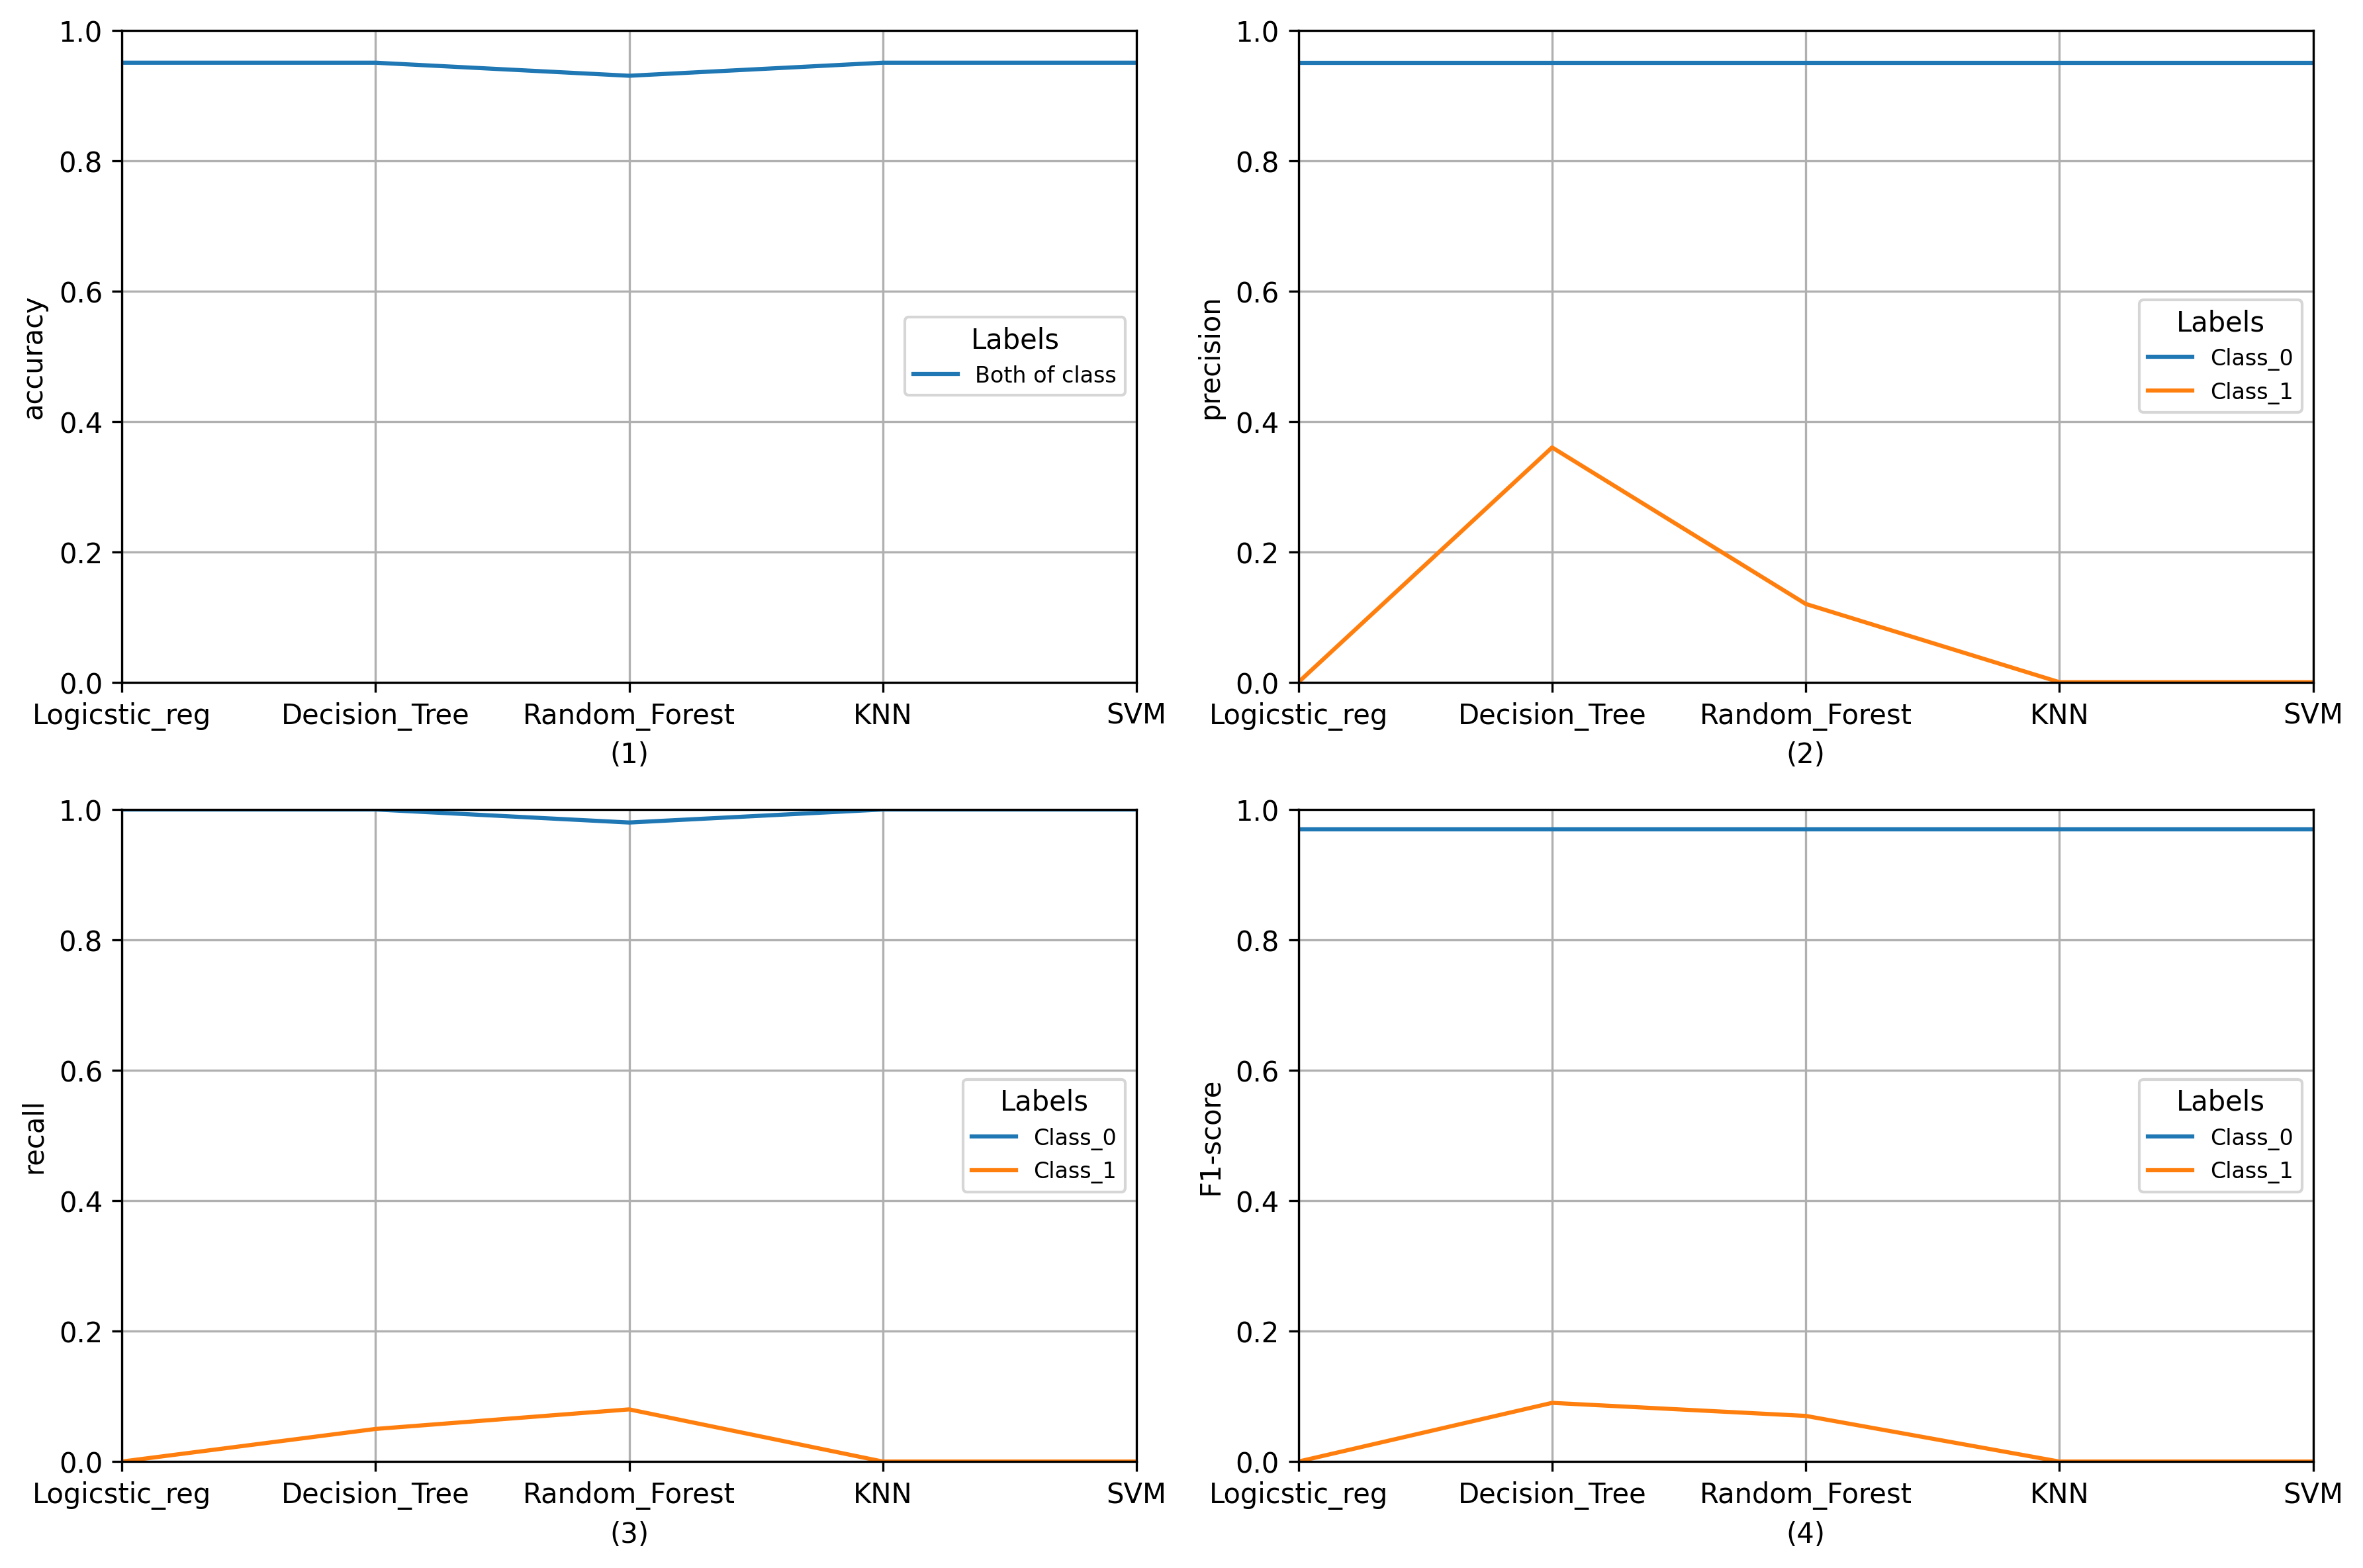

In [ ]:
plt.figure(figsize = (12,8), dpi=300)
plt.subplot(2, 2, 1)
plt.xlabel('(1)')
plt.ylabel('accuracy')
plt.xticks([0,1,2,3,4], ['Logicstic_reg','Decision_Tree','Random_Forest','KNN','SVM'])
plt.yticks([0.0,0.2,0.4,0.6,0.8,1.0])
plt.xlim([0, 4])
plt.ylim([0, 1])
plt.grid()
plt.plot(df_scores_models['num_of_models'],df_scores_models['accuracy'])
plt.legend(['Both of class'],loc = 'center right',prop={'size': 8}, title='Labels')

plt.subplot(2, 2, 2)
plt.xlabel('(2)')
plt.ylabel('precision')
plt.xticks([0,1,2,3,4], ['Logicstic_reg','Decision_Tree','Random_Forest','KNN','SVM'])
plt.yticks([0.0,0.2,0.4,0.6,0.8,1.0])
plt.xlim([0, 4])
plt.ylim([0, 1])
plt.grid()
plt.plot(df_scores_models['num_of_models'],df_scores_models['precision_class_0'],df_scores_models['precision_class_1'])
plt.legend(['Class_0','Class_1'],loc = 'center right',prop={'size': 8}, title='Labels')

plt.subplot(2, 2, 3)
plt.xlabel('(3)')
plt.ylabel('recall')
plt.xticks([0,1,2,3,4], ['Logicstic_reg','Decision_Tree','Random_Forest','KNN','SVM'])
plt.yticks([0.0,0.2,0.4,0.6,0.8,1.0])
plt.xlim([0, 4])
plt.ylim([0, 1])
plt.grid()
plt.plot(df_scores_models['num_of_models'],df_scores_models['recall_class_0'],df_scores_models['recall_class_1'])
plt.legend(['Class_0','Class_1'],loc = 'center right',prop={'size': 8}, title='Labels')

plt.subplot(2, 2, 4)
plt.xlabel('(4)')
plt.ylabel('F1-score')
plt.xticks([0,1,2,3,4], ['Logicstic_reg','Decision_Tree','Random_Forest','KNN','SVM'])
plt.yticks([0.0,0.2,0.4,0.6,0.8,1.0])
plt.xlim([0, 4])
plt.ylim([0, 1])
plt.grid()
plt.plot(df_scores_models['num_of_models'],df_scores_models['F1-score_class_0'],df_scores_models['F1-score_class_1'])
plt.legend(['Class_0','Class_1'],loc = 'center right',prop={'size': 8}, title='Labels')
plt.tight_layout()

# Phần 4.2: Xây dựng mô hình phân loại đã qua xử lý mất cân bằng dữ liệu và chọn ra biến quan trọng

# Dữ liệu bị mất cân bằng nên khi phân tích sâu vào class = 1 dự liệu dữ báo bị sai.

#  A) xử lý outliner

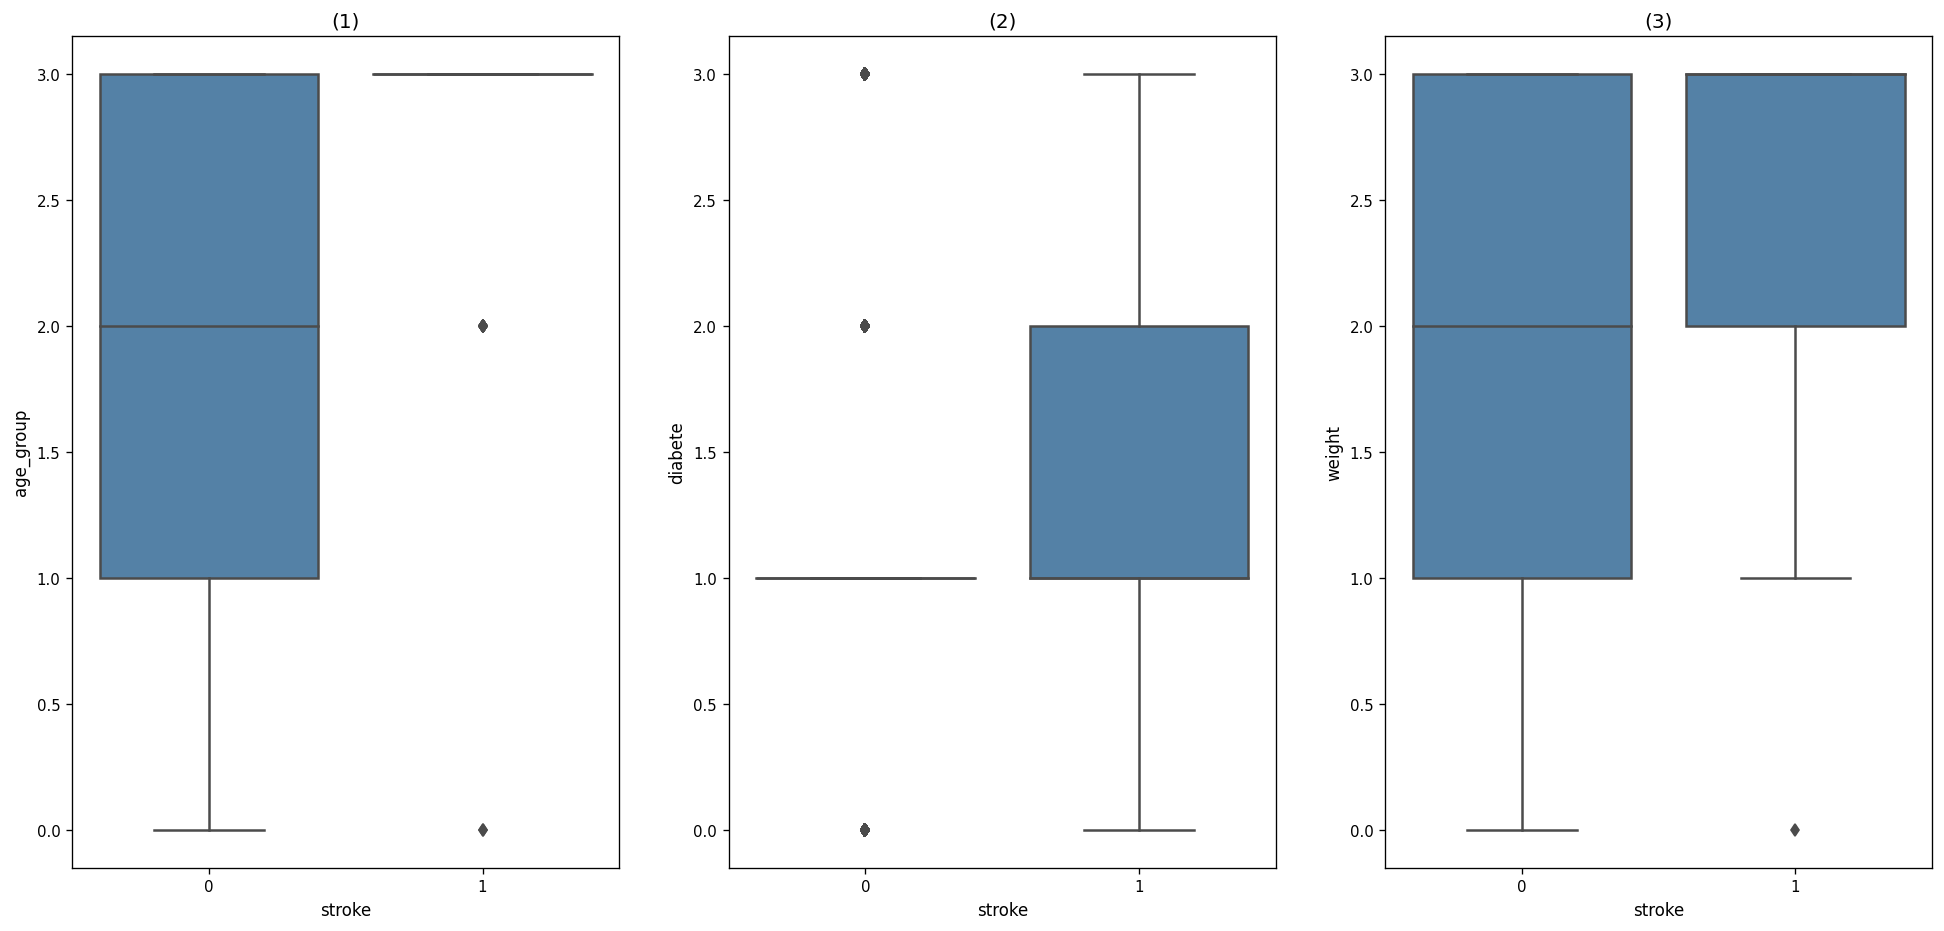

In [ ]:
# biểu đồ kiểm tra giá trị outliner
plt.figure(figsize=(20,9))

plt.subplot(1,3,1)
sns.boxplot(x = df['stroke'], y = df['age_group'], color = 'steelblue')
plt.title('age_group')
plt.title('(1)')
plt.tick_params(axis='both', labelsize=9)

plt.subplot(1,3,2)
sns.boxplot(x = df['stroke'], y = df['diabete'], color = 'steelblue')
plt.title('diabete')
plt.title('(2)')
plt.tick_params(axis='both', labelsize=9)

plt.subplot(1,3,3)
sns.boxplot(x = df['stroke'], y = df['weight'], color = 'steelblue')
plt.title('weight')
plt.title('(3)')
plt.tick_params(axis='both', labelsize=9)

In [ ]:
df['diabete'].unique()

array([3, 1, 2, 0])

In [ ]:
df_drop_outlier = df[df['age_group'] >= 1]
df_drop_outlier

,gender,age,age_group,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,diabete,bmi,weight,smoking_status,stroke
0,1,67.0,3,0,1,1,2,1,228.69,3,36.600000,3,2,1
1,2,61.0,3,0,0,1,3,0,202.21,3,30.745428,3,1,1
2,1,80.0,3,0,1,1,2,0,105.92,1,32.500000,3,1,1
3,2,49.0,3,0,0,1,2,1,171.23,2,34.400000,3,3,1
4,2,79.0,3,1,0,1,3,0,174.12,2,24.000000,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,2,80.0,3,1,0,1,2,1,83.75,1,30.745428,3,1,0
5106,2,81.0,3,0,0,1,3,1,125.20,1,40.000000,3,1,0
5107,2,35.0,2,0,0,1,3,0,82.99,1,30.600000,3,1,0
5108,1,51.0,3,0,0,1,2,0,166.29,2,25.600000,2,2,0


In [ ]:
df_new =  df_drop_outlier[['age','hypertension','heart_disease','avg_glucose_level','bmi','stroke']]
df_new

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
0,67.0,0,1,228.69,36.600000,1
1,61.0,0,0,202.21,30.745428,1
2,80.0,0,1,105.92,32.500000,1
3,49.0,0,0,171.23,34.400000,1
4,79.0,1,0,174.12,24.000000,1
...,...,...,...,...,...,...
5105,80.0,1,0,83.75,30.745428,0
5106,81.0,0,0,125.20,40.000000,0
5107,35.0,0,0,82.99,30.600000,0
5108,51.0,0,0,166.29,25.600000,0


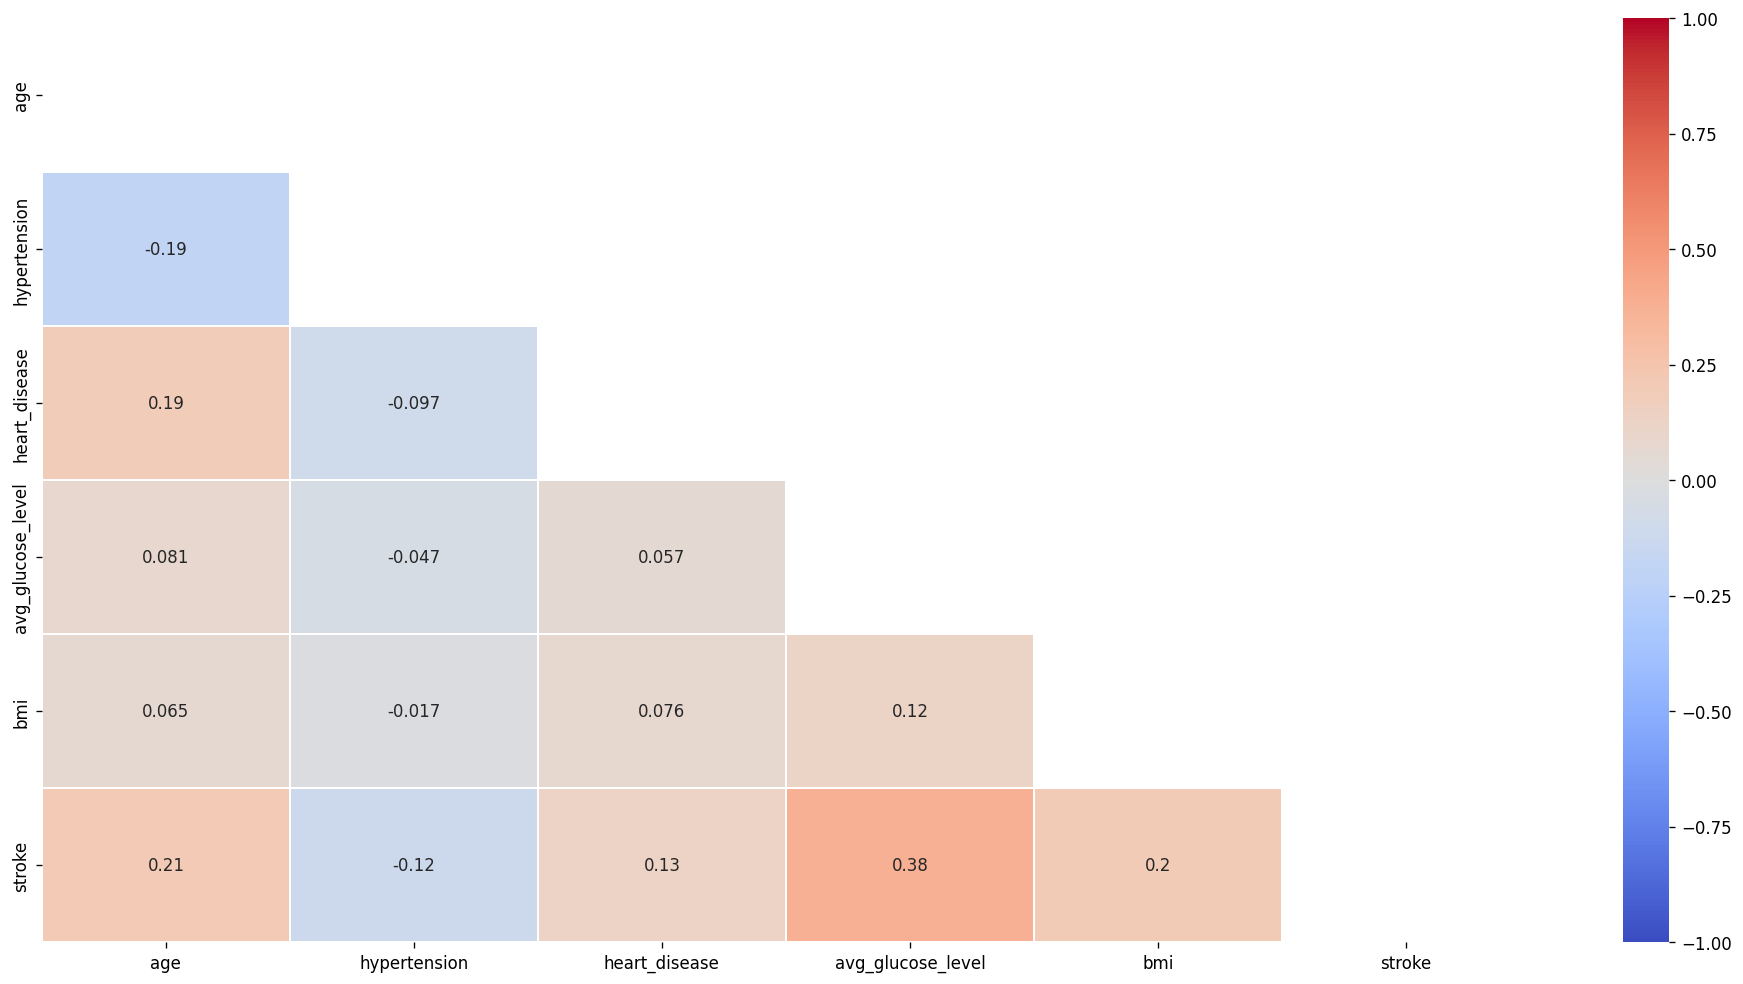

In [ ]:
#Corr
plt.figure(figsize=(20, 10))
corr = df_new.apply(lambda x: pd.factorize(x)[0]).corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
ax = sns.heatmap(corr, mask=mask, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, linewidths=.2, cmap='coolwarm', vmin=-1, vmax=1)

#B chạy model

# model_1: logicstic reg

In [ ]:
#Chọn dữ liệu X và y
X = df_new.drop(['stroke'],axis='columns',inplace=False) # không dùng cột stroke
y = df_new['stroke']
#Chia dữ liệu thành training set và test set
from sklearn.model_selection import train_test_split # Thư viện hỗ trợ chia data thành train và test set
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=0) # Chia dữ liệu với 30% số lượng là tets và 70% số lượng là training

In [ ]:
# xử lý mất cân bằng data
from imblearn.over_sampling import SMOTE
Oversample = SMOTE()
X_train, y_train = Oversample.fit_resample(X_train, y_train)

In [ ]:
#Xây dựng mô hình
from sklearn.linear_model import LogisticRegression #import thư viện
#1 Import mô hình LogisticRegression gán cho biến "model"
model = LogisticRegression()
#2.Training model với training set
model.fit(X_train, y_train) #Training model

LogisticRegression()

In [ ]:
y_pred = model.predict(X_test) #Dự báo cho tập test
y_pred

array([1, 0, 0, ..., 0, 0, 0])

In [ ]:
#Đánh giá mô hình lần 2
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred) #Tính độ chính xác của mô hình

0.7473282442748092

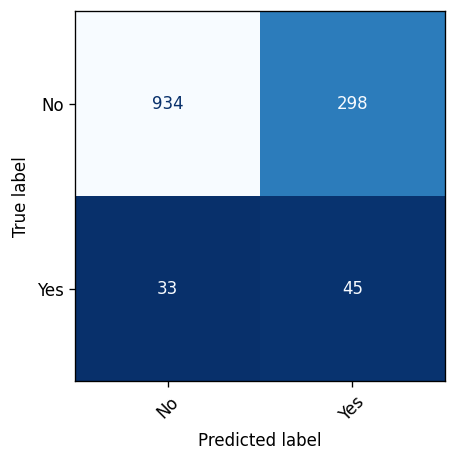

In [ ]:
#Đánh giá mô hình bằng confusion matrix
import seaborn as sns
from sklearn.metrics import confusion_matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
fig, ax = plt.subplots(figsize=(4, 4))
labels = ['No', 'Yes']#Tên class
ConfusionMatrixDisplay.from_predictions(
    y_test, y_pred, display_labels=labels, xticks_rotation=45,
    ax=ax, colorbar=False, cmap="Blues_r")

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.76      0.85      1232
           1       0.13      0.58      0.21        78

    accuracy                           0.75      1310
   macro avg       0.55      0.67      0.53      1310
weighted avg       0.92      0.75      0.81      1310



# Model_2: decision Tree

In [ ]:
#Chọn dữ liệu X và y
X = df_new.drop(['stroke'],axis='columns',inplace=False) # không dùng cột stroke
y = df_new['stroke']
#Chia dữ liệu thành training set và test set
from sklearn.model_selection import train_test_split # Thư viện hỗ trợ chia data thành train và test set
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=1) # Chia dữ liệu với 30% số lượng là tets và 70% số lượng là training

In [ ]:
# xử lý mất cân bằng data
from imblearn.over_sampling import SMOTE
Oversample = SMOTE()
X_train, y_train = Oversample.fit_resample(X_train, y_train)

In [ ]:
from sklearn import tree #Gọi mô hình và training
model_tree = tree.DecisionTreeClassifier(max_depth = 5)  #Set max_depth bất kỳ
model_tree.fit(X_train, y_train) #Training mô hình

DecisionTreeClassifier(max_depth=5)

In [ ]:
#Đánh giá độ chính xác của mô hình
y_pred=model_tree.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred) #Độ chính xác của DT

print('Độ chính xác của mô hình:', accuracy_score(y_test, y_pred))

Độ chính xác của mô hình: 0.6618320610687023


In [ ]:
# Sử dụng vòng lặp for để tìm max_depth
score_total=[]
for i in range(1,10):
  model_tree = tree.DecisionTreeClassifier(max_depth=i)
  model_tree.fit(X_train, y_train)
  y_pred=model_tree.predict(X_test)
  score_total.append(accuracy_score(y_test,y_pred)*100)

In [ ]:
score_total

[65.72519083969466,
 65.72519083969466,
 69.61832061068702,
 75.57251908396947,
 66.18320610687023,
 68.93129770992367,
 69.46564885496184,
 73.5114503816794,
 74.27480916030534]

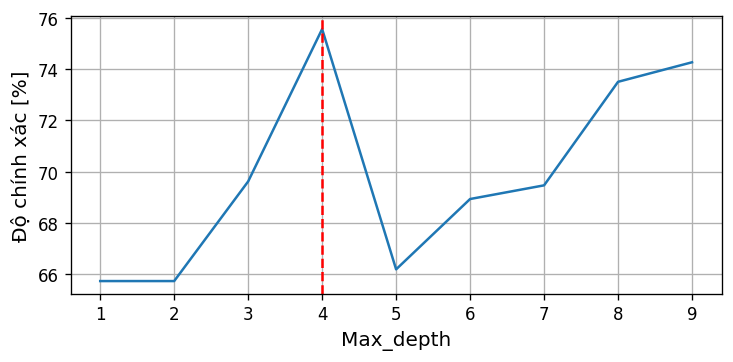

In [ ]:
#Vẽ hình thể hiện độ chính xác theo giá trị max_depth
plt.rcParams.update({'figure.figsize':(7,3), 'figure.dpi':120})
plt.ylabel('Độ chính xác [%]',fontsize=12)
plt.xlabel('Max_depth',fontsize=12)
plt.plot(range(1, 10), score_total)
plt.xticks(range(1, 10))
plt.axvline(x = 4, color='r', linestyle='--')
plt.grid('minor')

In [ ]:
# Vẽ lại cây quyết định như sau:
from sklearn import tree
model = tree.DecisionTreeClassifier(max_depth = 4)
model = model.fit(X_train, y_train)#Tính toán/fit model

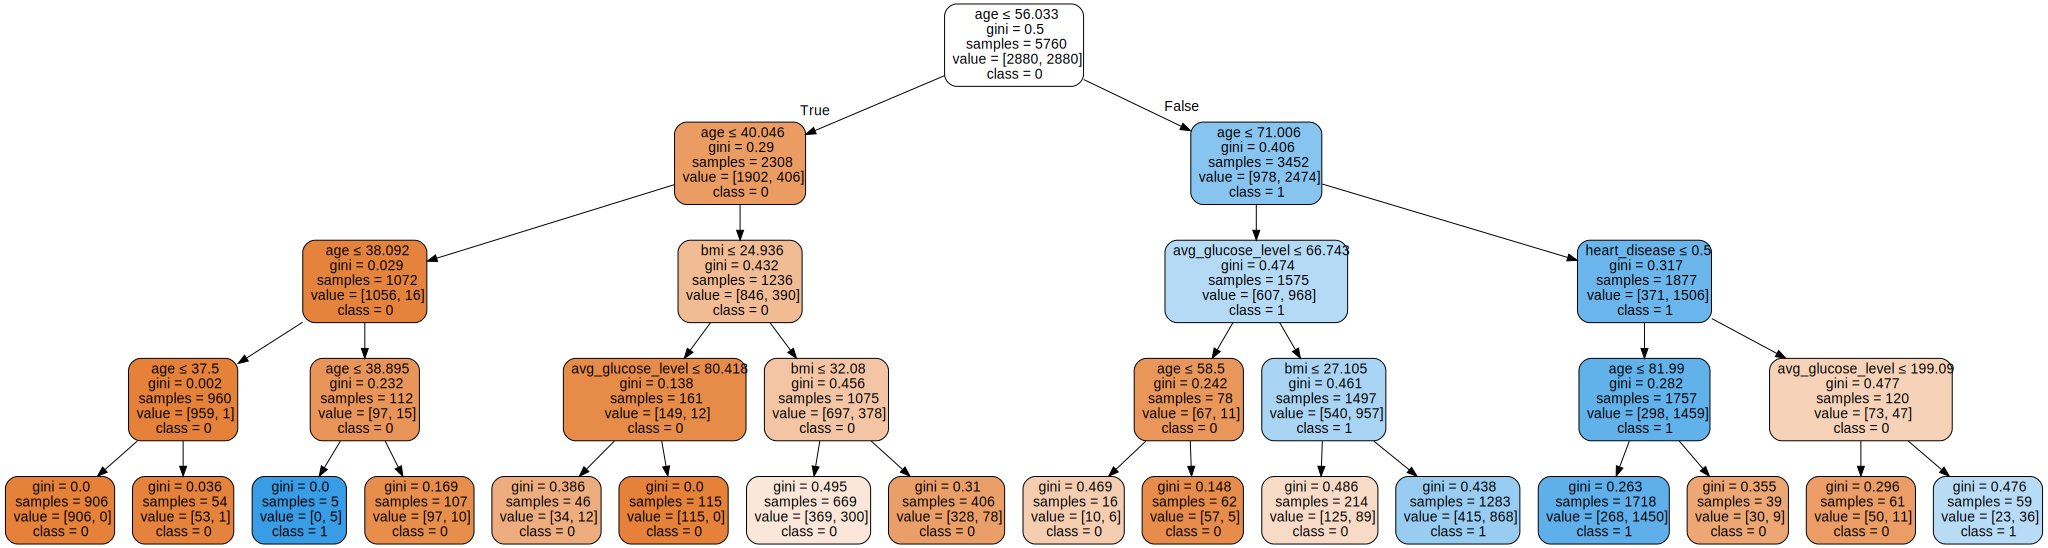

In [ ]:
import graphviz #Thư viện để hiển thị hình ảnh
dot_data = tree.export_graphviz(model, out_file=None,feature_names=['age','hypertension','heart_disease','avg_glucose_level','bmi'],class_names=['0','1'],filled=True, rounded = True, special_characters=True)
graph = graphviz.Source(dot_data)
graph

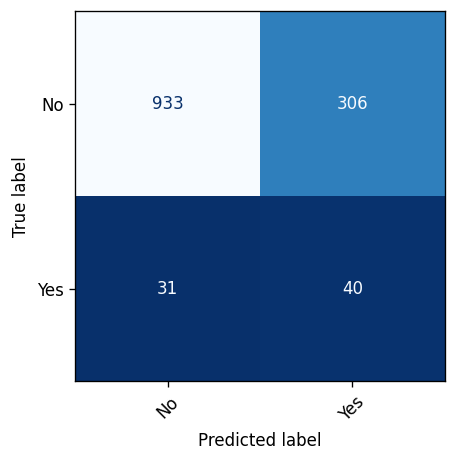

In [ ]:
#Đánh giá mô hình bằng confusion matrix
import seaborn as sns
from sklearn.metrics import confusion_matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
fig, ax = plt.subplots(figsize=(4, 4))
labels = ['No', 'Yes']#Tên class
ConfusionMatrixDisplay.from_predictions(
    y_test, y_pred, display_labels=labels, xticks_rotation=45,
    ax=ax, colorbar=False, cmap="Blues_r")

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.75      0.85      1239
           1       0.12      0.56      0.19        71

    accuracy                           0.74      1310
   macro avg       0.54      0.66      0.52      1310
weighted avg       0.92      0.74      0.81      1310



# Model_3: Mô hình random forest

In [ ]:
#Chọn dữ liệu X và y
X = df_new.drop(['stroke'],axis='columns',inplace=False) # không dùng cột stroke
y = df_new['stroke']
#Chia dữ liệu thành training set và test set
from sklearn.model_selection import train_test_split # Thư viện hỗ trợ chia data thành train và test set
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=0) # Chia dữ liệu với 30% số lượng là tets và 70% số lượng là training

In [ ]:
# xử lý mất cân bằng data
from imblearn.over_sampling import SMOTE
Oversample = SMOTE()
X_train, y_train = Oversample.fit_resample(X_train, y_train)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=3)
rf.fit(X_train, y_train)
y_pred=rf.predict(X_test)
accuracy_score(y_test,y_pred)

print('Độ chính xác của mô hình:', accuracy_score(y_test, y_pred))

Độ chính xác của mô hình: 0.8572519083969465


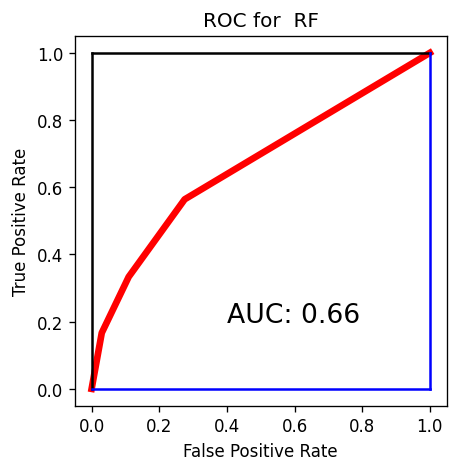

In [ ]:
from sklearn.metrics import roc_auc_score,roc_curve
y_probabilities = rf.predict_proba(X_test)[:,1] #Thay tên model phù hợp
false_positive_rate, true_positive_rate, threshold = roc_curve(y_test,y_probabilities)
plt.figure(figsize=(4,4))
plt.title('ROC for  RF')
plt.plot(false_positive_rate, true_positive_rate, linewidth=4, color='red')
#plt.plot([0,1],ls='--',linewidth=5)
plt.plot([0,0],[1,0],c='0')
plt.plot([1,1],c='0')
plt.plot([0,0],c='b')
plt.plot([1,1],[1,0],c='b')
plt.text(0.4,0.2,'AUC: {:.2f}'.format(roc_auc_score(y_test,y_probabilities)),size= 16)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

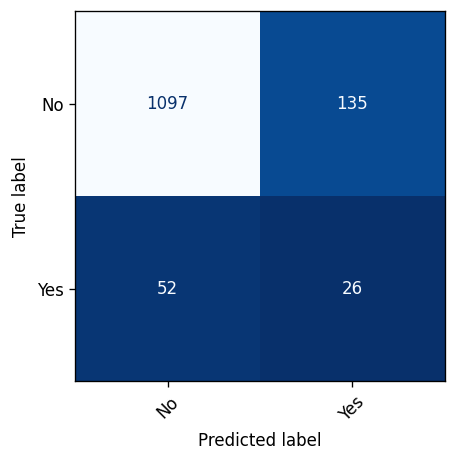

In [ ]:
#Đánh giá mô hình bằng confusion matrix
import seaborn as sns
from sklearn.metrics import confusion_matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
fig, ax = plt.subplots(figsize=(4, 4))
labels = ['No', 'Yes']#Tên class
ConfusionMatrixDisplay.from_predictions(
    y_test, y_pred, display_labels=labels, xticks_rotation=45,
    ax=ax, colorbar=False, cmap="Blues_r")

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.89      0.92      1232
           1       0.16      0.33      0.22        78

    accuracy                           0.86      1310
   macro avg       0.56      0.61      0.57      1310
weighted avg       0.91      0.86      0.88      1310



# Xử lý Hyperparameters random forest

In [ ]:
#Chọn dữ liệu X và y
X = df_new.drop(['stroke'],axis='columns',inplace=False) # không dùng cột stroke
y = df_new['stroke']
#Chia dữ liệu thành training set và test set
from sklearn.model_selection import train_test_split # Thư viện hỗ trợ chia data thành train và test set
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=0) # Chia dữ liệu với 30% số lượng là tets và 70% số lượng là training

In [ ]:
# xử lý mất cân bằng data
from imblearn.over_sampling import SMOTE
Oversample = SMOTE()
X_train, y_train = Oversample.fit_resample(X_train, y_train)

In [ ]:
#hyperparameters turning
#from sklearn.model_selection import RandomizedSearchCV
rf = RandomForestClassifier()
from sklearn.model_selection import GridSearchCV
grid_space = {'max_depth':[1,2,3,4,5,6,7,8,9,10, None],
              'n_estimators':[5,10,15,20,25,30],
              'criterion':['gini','entropy'],
              }
rf_grid = GridSearchCV(rf, param_grid=grid_space, scoring='accuracy')
model_grid = rf_grid.fit(X_train, y_train)

In [ ]:
model_grid.best_params_

{'criterion': 'entropy', 'max_depth': None, 'n_estimators': 30}

In [ ]:
y_pred=model_grid.predict(X_test)
accuracy_score(y_test,y_pred)

0.8778625954198473

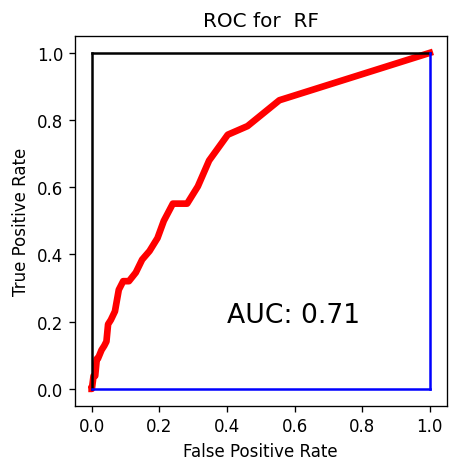

In [ ]:
from sklearn.metrics import roc_auc_score,roc_curve
y_probabilities = model_grid.predict_proba(X_test)[:,1]
false_positive_rate, true_positive_rate, threshold = roc_curve(y_test,y_probabilities)
plt.figure(figsize=(4,4))
plt.title('ROC for  RF')
plt.plot(false_positive_rate, true_positive_rate, linewidth=4, color='red')
#plt.plot([0,1],ls='--',linewidth=5)
plt.plot([0,0],[1,0],c='0')
plt.plot([1,1],c='0')
plt.plot([0,0],c='b')
plt.plot([1,1],[1,0],c='b')
plt.text(0.4,0.2,'AUC: {:.2f}'.format(roc_auc_score(y_test,y_probabilities)),size= 16)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

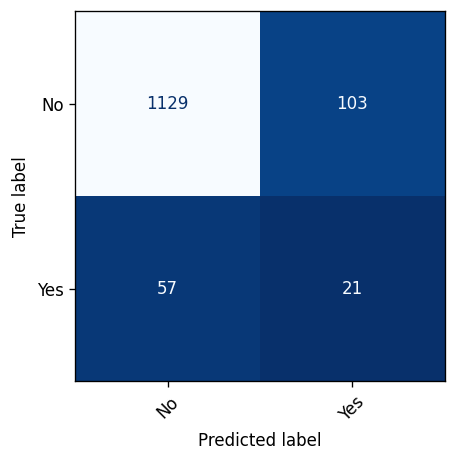

In [ ]:
#Đánh giá mô hình bằng confusion matrix
import seaborn as sns
from sklearn.metrics import confusion_matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
fig, ax = plt.subplots(figsize=(4, 4))
labels = ['No', 'Yes']#Tên class
ConfusionMatrixDisplay.from_predictions(
    y_test, y_pred, display_labels=labels, xticks_rotation=45,
    ax=ax, colorbar=False, cmap="Blues_r")

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.92      0.93      1232
           1       0.17      0.27      0.21        78

    accuracy                           0.88      1310
   macro avg       0.56      0.59      0.57      1310
weighted avg       0.91      0.88      0.89      1310



# Model_4: Mô hình KNN

In [ ]:
#Chọn dữ liệu X và y
X = df_new.drop(['stroke'],axis='columns',inplace=False) # không dùng cột stroke
y = df_new['stroke']
#Chia dữ liệu thành training set và test set
from sklearn.model_selection import train_test_split # Thư viện hỗ trợ chia data thành train và test set
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=0) # Chia dữ liệu với 30% số lượng là tets và 70% số lượng là training

In [ ]:
# xử lý mất cân bằng data
from imblearn.over_sampling import SMOTE
Oversample = SMOTE()
X_train, y_train = Oversample.fit_resample(X_train, y_train)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
model_knn = KNeighborsClassifier(n_neighbors = 5) #Dữ liệu đơn giản chúng ta có thể lựa chọn n_neighbors với giá trị nhỏ vẫn đảm bảo độ chính xác
model_knn.fit(X_train,y_train)#Training

KNeighborsClassifier()

In [ ]:
y_pred=model_knn.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
#Đánh giá độ chính xác của mô hình
model_knn.score(X_test,y_test)

0.7900763358778626

In [ ]:
import seaborn as sns
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[993, 239],
       [ 36,  42]])

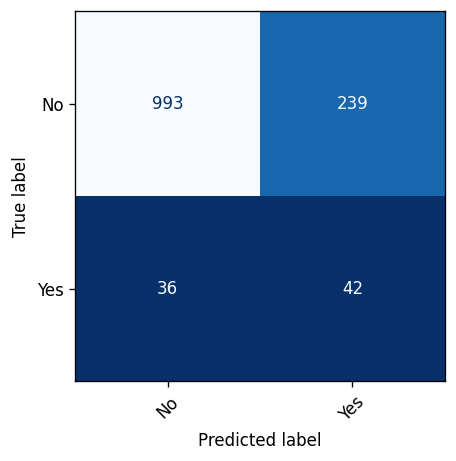

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
fig, ax = plt.subplots(figsize=(4, 4))
labels = ['No', 'Yes']#Tên class
ConfusionMatrixDisplay.from_predictions(
    y_test, y_pred, display_labels=labels, xticks_rotation=45,
    ax=ax, colorbar=False, cmap="Blues_r")

In [ ]:
# Thử chọn các giá trị n_neighbors cao hơn xem độ chính xác có được nâng cao hay không
ac=[] #Tạo list rỗng chứa giá trị của độ chính xác
for k in range (2,20,1):
  knn = KNeighborsClassifier(n_neighbors=k)
  knn.fit(X_train, y_train)
  y_pred = knn.predict(X_test)
  ac.append(metrics.accuracy_score(y_test, y_pred))
  print("Accuracy at k =",k,metrics.accuracy_score(y_test, y_pred))

Accuracy at k = 2 0.8603053435114504
Accuracy at k = 3 0.8083969465648855
Accuracy at k = 4 0.8351145038167939
Accuracy at k = 5 0.7900763358778626
Accuracy at k = 6 0.8068702290076336
Accuracy at k = 7 0.7725190839694657
Accuracy at k = 8 0.7893129770992366
Accuracy at k = 9 0.7564885496183206
Accuracy at k = 10 0.7709923664122137
Accuracy at k = 11 0.7526717557251908
Accuracy at k = 12 0.76793893129771
Accuracy at k = 13 0.7419847328244275
Accuracy at k = 14 0.7549618320610687
Accuracy at k = 15 0.73206106870229
Accuracy at k = 16 0.7435114503816794
Accuracy at k = 17 0.7244274809160305
Accuracy at k = 18 0.7381679389312977
Accuracy at k = 19 0.716030534351145


In [ ]:
len(ac)

18

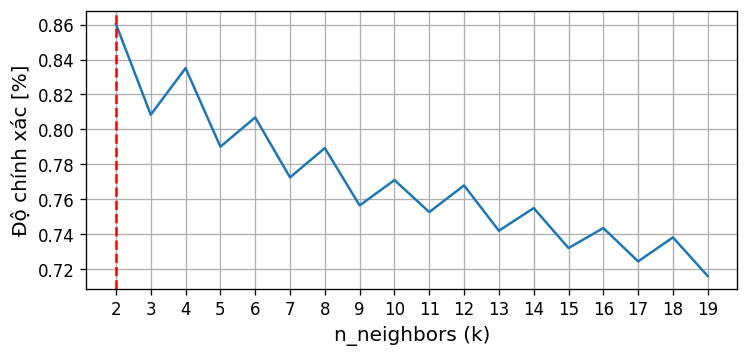

In [ ]:
#Vẽ hình thể hiện độ chính xác theo giá trị n_neighbors
plt.ylabel('Độ chính xác [%]',fontsize=12)
plt.xlabel('n_neighbors (k)',fontsize=12)
plt.plot(range(2, 20), ac)
plt.xticks(range(2, 20))
plt.axvline(x=2, color='r', linestyle='--')
plt.grid('minor')
#Có thể chọn n_neighbors bằng 2 để có kết quả tốt nhất

# Thay n_neightbors = 2 đã được xác định

In [ ]:
#Chọn dữ liệu X và y
X = df_new.drop(['stroke'],axis='columns',inplace=False) # không dùng cột stroke
y = df_new['stroke']
#Chia dữ liệu thành training set và test set
from sklearn.model_selection import train_test_split # Thư viện hỗ trợ chia data thành train và test set
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=0) # Chia dữ liệu với 30% số lượng là tets và 70% số lượng là training

In [ ]:
# xử lý mất cân bằng data
from imblearn.over_sampling import SMOTE
Oversample = SMOTE()
X_train, y_train = Oversample.fit_resample(X_train, y_train)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
model_knn = KNeighborsClassifier(n_neighbors = 2)
model_knn.fit(X_train,y_train)#Training

KNeighborsClassifier(n_neighbors=2)

In [ ]:
y_pred=model_knn.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
#Đánh giá độ chính xác của mô hình
model_knn.score(X_test,y_test)

0.8549618320610687

In [ ]:
import seaborn as sns
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[1094,  138],
       [  52,   26]])

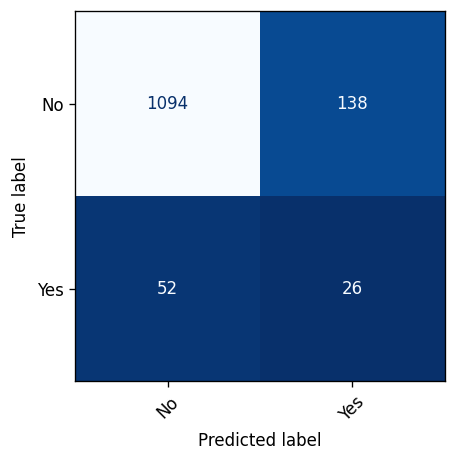

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
fig, ax = plt.subplots(figsize=(4, 4))
labels = ['No', 'Yes']#Tên class
ConfusionMatrixDisplay.from_predictions(
    y_test, y_pred, display_labels=labels, xticks_rotation=45,
    ax=ax, colorbar=False, cmap="Blues_r")

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.89      0.92      1232
           1       0.16      0.33      0.21        78

    accuracy                           0.85      1310
   macro avg       0.56      0.61      0.57      1310
weighted avg       0.91      0.85      0.88      1310



# Model_5: Support Vector Machine


In [ ]:
#Chọn dữ liệu X và y
X = df_new.drop(['stroke'],axis='columns',inplace=False) # không dùng cột stroke
y = df_new['stroke']
#Chia dữ liệu thành training set và test set
from sklearn.model_selection import train_test_split # Thư viện hỗ trợ chia data thành train và test set
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=0) # Chia dữ liệu với 30% số lượng là tets và 70% số lượng là training

In [ ]:
# xử lý mất cân bằng data
from imblearn.over_sampling import SMOTE
Oversample = SMOTE()
X_train, y_train = Oversample.fit_resample(X_train, y_train)

In [ ]:
#Xây dựng mô hình
from sklearn.svm import SVC
model = SVC(kernel='linear', C= 0.001, gamma=0.0001) # Sử dụng Linear Kernel
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [ ]:
#Đánh giá độ chính xác của mô hình
from sklearn import metrics
from sklearn.metrics import classification_report
metrics.accuracy_score(y_test, y_pred)

0.73206106870229

In [ ]:
#In ra báo cáo đánh giá của mô hình
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.73      0.84      1232
           1       0.15      0.76      0.25        78

    accuracy                           0.73      1310
   macro avg       0.57      0.74      0.54      1310
weighted avg       0.93      0.73      0.80      1310



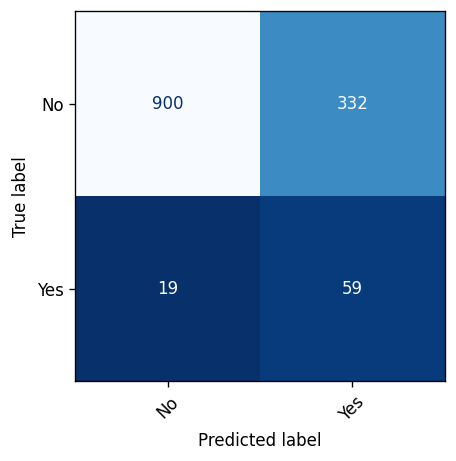

In [ ]:
#Vẽ confusion matrix theo hàm plot có sẵn
#plot_confusion_matrix(model, X_test, y_test)
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
fig, ax = plt.subplots(figsize=(4, 4))
labels = ['No', 'Yes']#Tên class
ConfusionMatrixDisplay.from_predictions(
    y_test, y_pred, display_labels=labels, xticks_rotation=45,
    ax=ax, colorbar=False, cmap="Blues_r")

# tạo bảng thống kê kết của các mô hình trên

In [ ]:
data_scores_models_2 = [
            ('1','logictis_reg', 0.97,0.76,0.85,0.13,0.59,0.22,0.75),
            ('2','Decision_tree', 0.95,0.76,0.84,0.10,0.42,0.16,0.74),
            ('3','Random_forest', 0.95,0.88,0.91,0.13,0.28,0.18,0.85),
            ('4','KNN', 0.95,0.89,0.92,0.15,0.31,0.21,0.86),
            ('5','SVM', 0.98,0.72,0.83,0.15,0.76,0.25,0.73)
            ]

# Khởi tạo DataFrame
df_scores_models_2 = pd.DataFrame(data = data_scores_models_2, columns = ['num_of_models','model_type', 'precision_class_0','recall_class_0','F1-score_class_0','precision_class_1','recall_class_1','F1-score_class_1','accuracy'])
df_scores_models_2

,num_of_models,model_type,precision_class_0,recall_class_0,F1-score_class_0,precision_class_1,recall_class_1,F1-score_class_1,accuracy
0,1,logictis_reg,0.97,0.76,0.85,0.13,0.59,0.22,0.75
1,2,Decision_tree,0.95,0.76,0.84,0.10,0.42,0.16,0.74
2,3,Random_forest,0.95,0.88,0.91,0.13,0.28,0.18,0.85
3,4,KNN,0.95,0.89,0.92,0.15,0.31,0.21,0.86
4,5,SVM,0.98,0.72,0.83,0.15,0.76,0.25,0.73


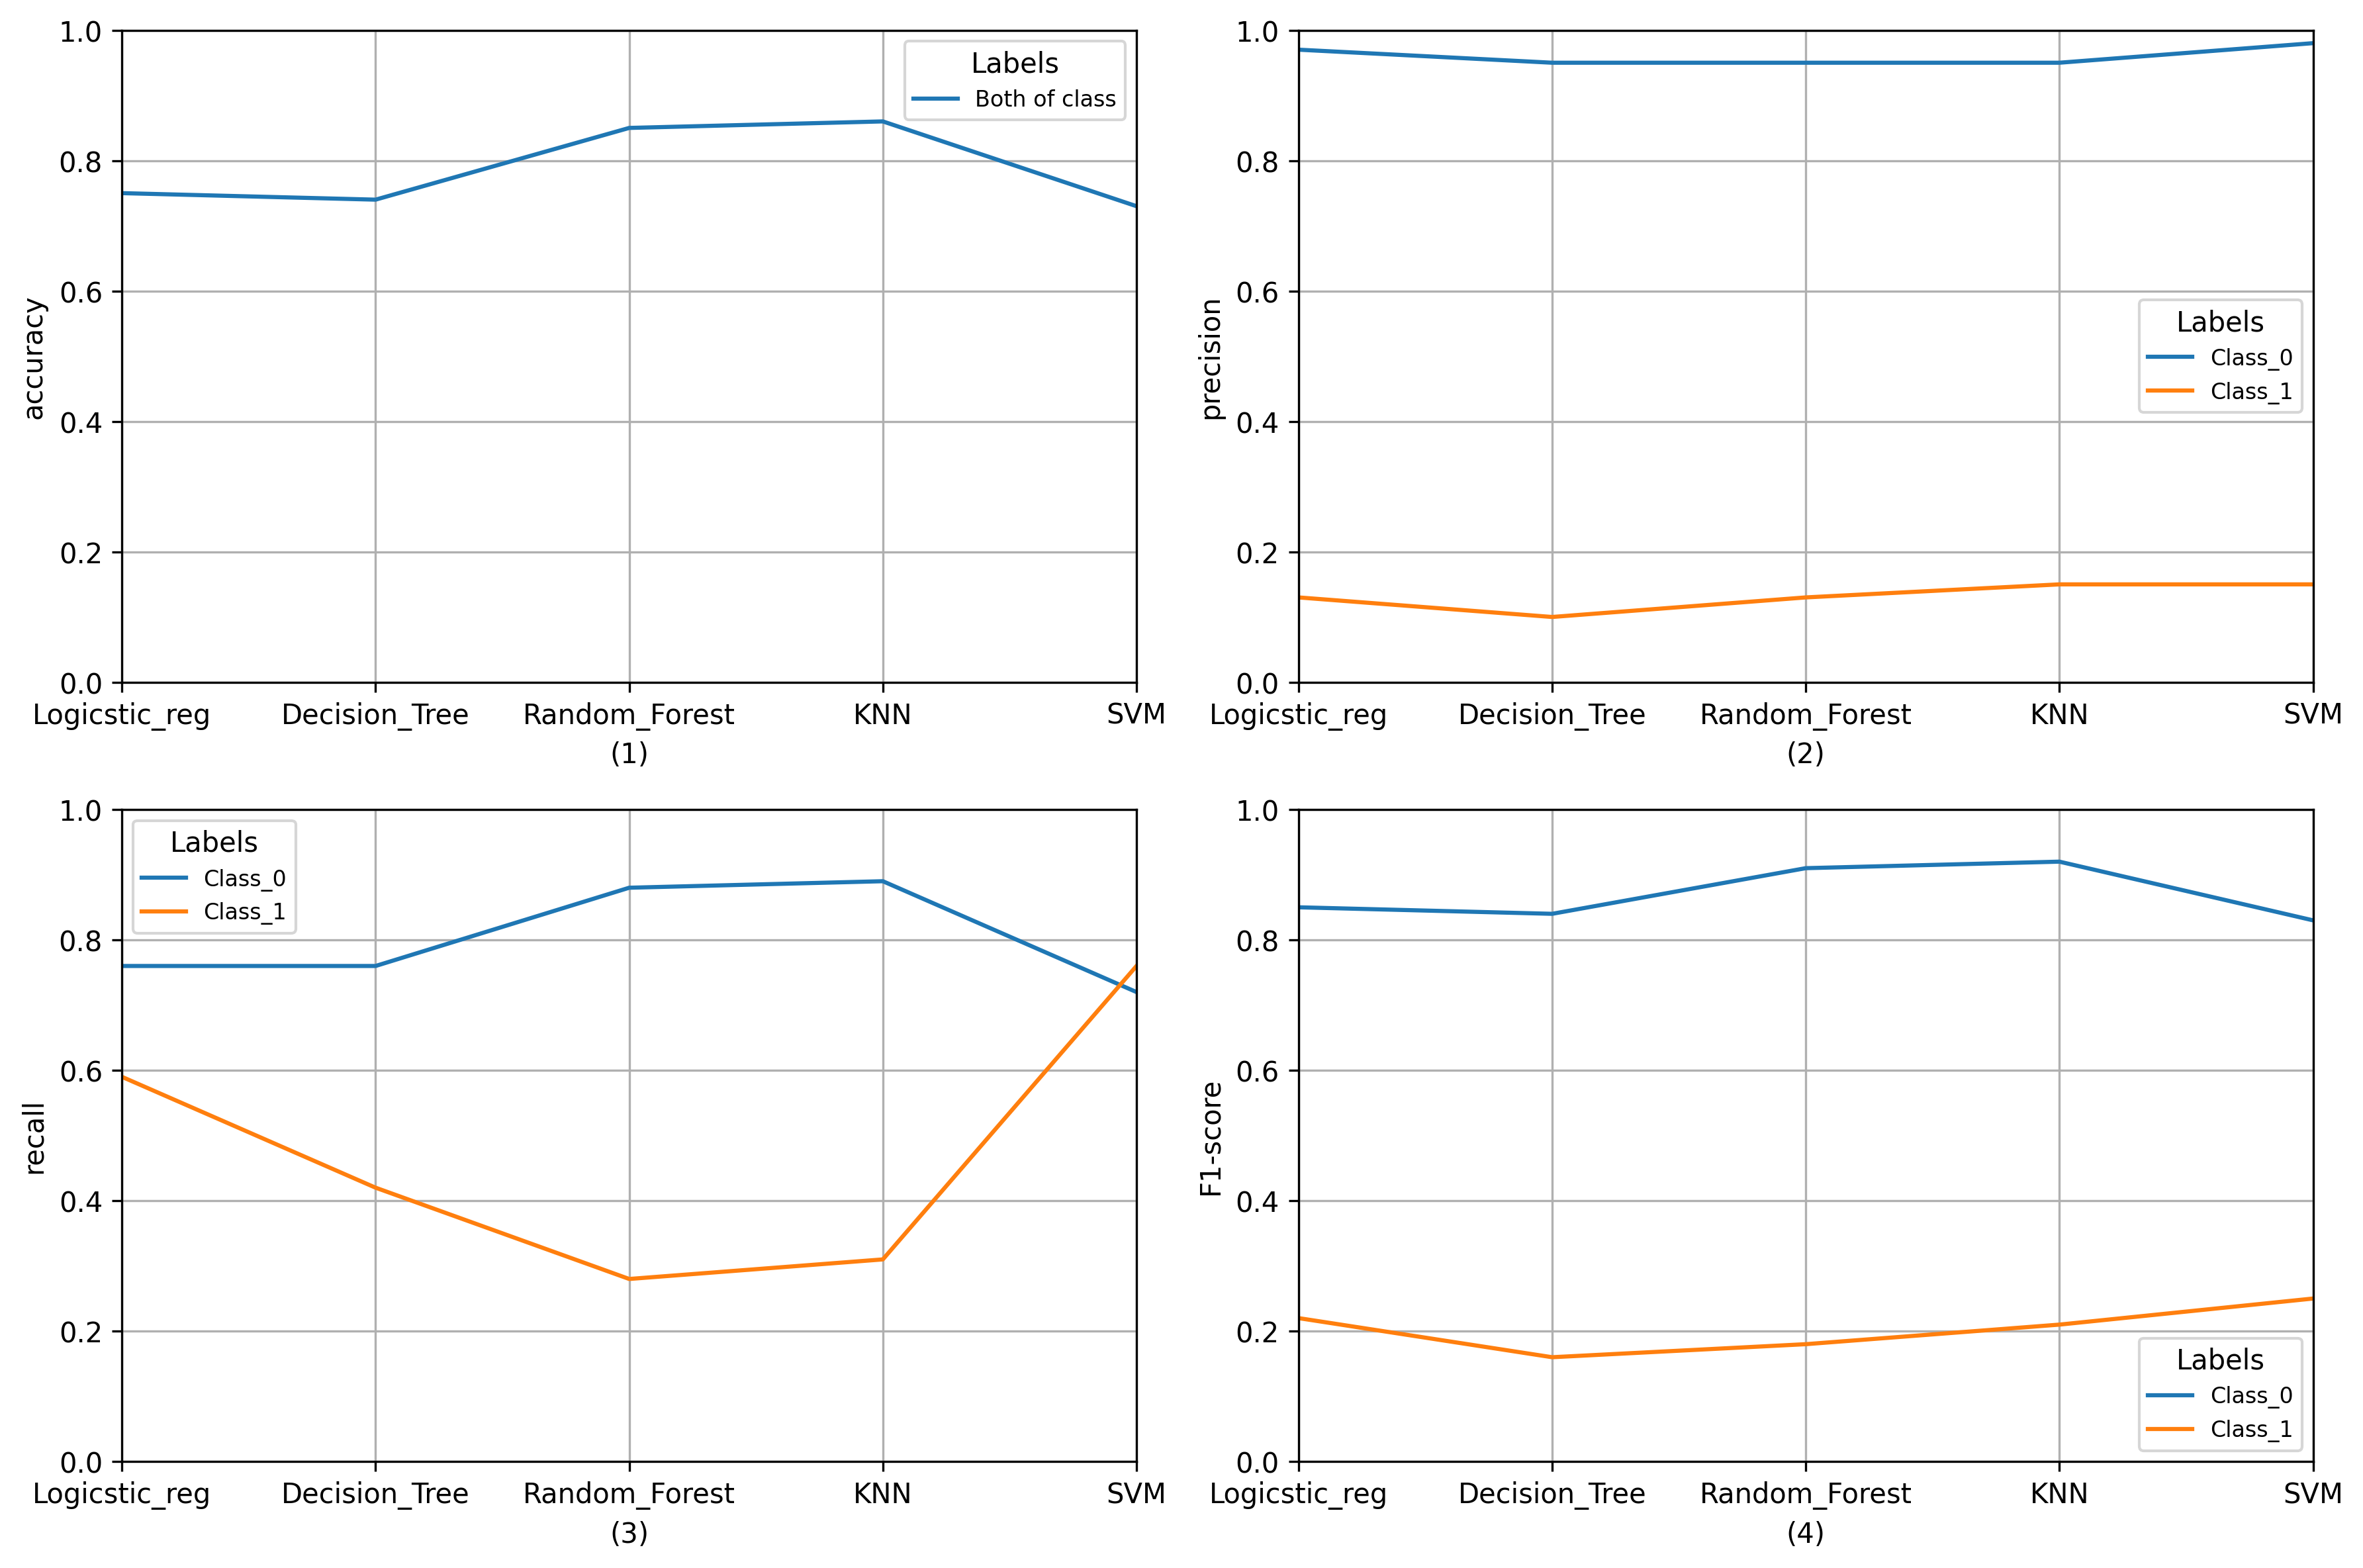

In [ ]:
plt.figure(figsize = (12,8), dpi=300)
plt.subplot(2, 2, 1)
plt.xlabel('(1)')
plt.ylabel('accuracy')
plt.xticks([0,1,2,3,4],['Logicstic_reg','Decision_Tree','Random_Forest','KNN','SVM'])
plt.yticks([0.0,0.2,0.4,0.6,0.8,1.0])
plt.xlim([0, 4])
plt.ylim([0, 1])
plt.grid()
plt.plot(df_scores_models_2['num_of_models'],df_scores_models_2['accuracy'])
plt.legend(['Both of class'],prop={'size': 8}, title='Labels')

plt.subplot(2, 2, 2)
plt.xlabel('(2)')
plt.ylabel('precision')
plt.xticks([0,1,2,3,4],['Logicstic_reg','Decision_Tree','Random_Forest','KNN','SVM'])
plt.yticks([0.0,0.2,0.4,0.6,0.8,1.0])
plt.xlim([0, 4])
plt.ylim([0, 1])
plt.grid()
plt.plot(df_scores_models_2['num_of_models'], df_scores_models_2['precision_class_0'], df_scores_models_2['precision_class_1'])
plt.legend(['Class_0','Class_1'],prop={'size': 8}, title='Labels')

plt.subplot(2, 2, 3)
plt.xlabel('(3)')
plt.ylabel('recall')
plt.xticks([0,1,2,3,4],['Logicstic_reg','Decision_Tree','Random_Forest','KNN','SVM'])
plt.yticks([0.0,0.2,0.4,0.6,0.8,1.0])
plt.xlim([0, 4])
plt.ylim([0, 1])
plt.grid()
plt.plot(df_scores_models_2['num_of_models'],df_scores_models_2['recall_class_0'],df_scores_models_2['recall_class_1'])
plt.legend(['Class_0','Class_1'],prop={'size': 8}, title='Labels')

plt.subplot(2, 2, 4)
plt.xlabel('(4)')
plt.ylabel('F1-score')
plt.xticks([0,1,2,3,4],['Logicstic_reg','Decision_Tree','Random_Forest','KNN','SVM'])
plt.yticks([0.0,0.2,0.4,0.6,0.8,1.0])
plt.xlim([0, 4])
plt.ylim([0, 1])
plt.grid()
plt.plot(df_scores_models_2['num_of_models'],df_scores_models_2['F1-score_class_0'],df_scores_models_2['F1-score_class_1'])
plt.legend(['Class_0','Class_1'],prop={'size': 8}, title='Labels')
plt.tight_layout()

# Sử dụng mô hình SVM để dự báo

In [ ]:
#Xây dựng mô hình
from sklearn.svm import SVC
model = SVC(kernel='linear', C= 0.001, gamma=0.0001) # Sử dụng Linear Kernel
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [ ]:
# xử lý mất cân bằng data
from imblearn.over_sampling import SMOTE
Oversample = SMOTE()
X_train, y_train = Oversample.fit_resample(X_train, y_train)

In [ ]:
#Đánh giá độ chính xác của mô hình
from sklearn import metrics
from sklearn.metrics import classification_report
metrics.accuracy_score(y_test, y_pred)

0.73206106870229

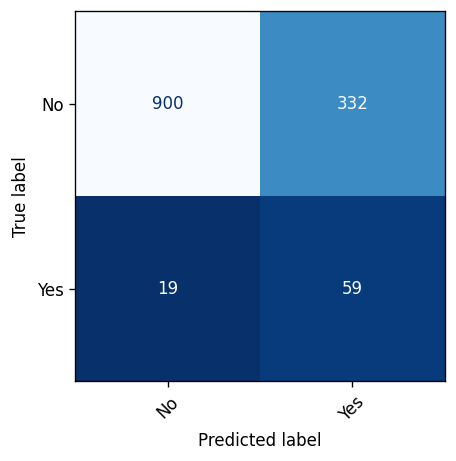

In [ ]:
#Vẽ confusion matrix theo hàm plot có sẵn
#plot_confusion_matrix(model, X_test, y_test)
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
fig, ax = plt.subplots(figsize=(4, 4))
labels = ['No', 'Yes']#Tên class
ConfusionMatrixDisplay.from_predictions(
    y_test, y_pred, display_labels=labels, xticks_rotation=45,
    ax=ax, colorbar=False, cmap="Blues_r")

In [ ]:
#In ra báo cáo đánh giá của mô hình
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.73      0.84      1232
           1       0.15      0.76      0.25        78

    accuracy                           0.73      1310
   macro avg       0.57      0.74      0.54      1310
weighted avg       0.93      0.73      0.80      1310



In [ ]:
df_new.head(5)

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
0,67.0,0,1,228.69,36.600000,1
1,61.0,0,0,202.21,30.745428,1
2,80.0,0,1,105.92,32.500000,1
3,49.0,0,0,171.23,34.400000,1
4,79.0,1,0,174.12,24.000000,1


In [ ]:
# Giả sử dự báo điểm bất kì
print(model.predict([[40,1,0,180,23]]))
# Vậy ta dự đoán được người 40 tuổi, có bệnh huyết áp, không bệnh tim, lượng đường trb 180, bmi = 30
# thì chưa có nguy cơ đột quỵ

[0]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


In [ ]:
# Giả sử dự báo điểm bất kì
print(model.predict([[60,1,0,180,23]]))
# Vậy ta dự đoán được người 60 tuổi, có bệnh huyết áp, không bệnh tim, lượng đường trb 180, bmi = 30
# thìcó nguy cơ đột quỵ

[1]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
